[KARUNATHASAN Nilany](https://www.linkedin.com/in/nilany-karunathasan-7b49691ba?)  <br>
[SAMBATH Sïndoumady](https://www.linkedin.com/in/s%C3%AFndoumady-sambath-a7519a209?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app) <br>
[Github Link](https://github.com/nilanyK/nlp_esilv/tree/main/PROJECT2)<br>
[Streamlit App Link](https://project2nlp.streamlit.app/)<br>
DIA2


#### <center><font align="center">MACHINE LEARNING FOR NLP - PROJECT 2</font></center>
# <center><font align="center"> Data Exploration and NLP Modeling </font></center>
<div style="text-align:center;">
    <span style="display:inline-block; margin-right: 20px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Trustpilot_logo.png" alt="Trustpilot Logo" width="100"/>
    </span>
    <span style="display:inline-block;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/a/ad/Yelp_Logo.svg" alt="Yelp Logo" width="100"/>
    </span>
</div>


---

In this  Notebook, we present the results of our exploration and modeling efforts in the realm of Natural Language Processing (NLP) for restaurant reviews. Our project focuses on leveraging NLP techniques to extract valuable insights from customer reviews gathered from prominent review platforms. <br>
To build a comprehensive database, we opted to collect information from two primary sources: Trustpilot and Yelp. Trustpilot, a customer review site, and Yelp, , provide a rich dataset of restaurant reviews.


Our primary objective is to extract meaningful insights from restaurant reviews, providing a nuanced understanding of customer sentiments, preferences, and themes. Through the application of cutting-edge NLP techniques, we aim to deliver accurate predictions and empower users with a valuable tool for exploring and understanding the restaurant landscape.

## SUMMARY

[I. Scrapping Trustpilot](#I.-Scrapping-Trustpilot) <br>
[II. Scrapping Yelp](#II.-Scrapping-Yelp) <br>
[III. Dataset Preparation](#III.-Dataset-Preparation) <br>
[IV. Visualizations & Initial Conclusions](#III.-Visualizations-&-Initial-Conclusions) <br>
[V. Sentiment Analysis](#V.-Sentiment-Analysis) <br>
[VI. Topic Modeling and Lists of Topics](#VI.-Topic-Modeling-and-Lists-of-Topics) <br>
[VII. Embedding to Identify Similar Words](#VII.-Embedding-to-Identify-Similar-Words) <br>
[VIII. QA System](#VIII.-QA-System) <br>
[IX. Summary](#IX.-Summary) <br>
[X. Supervised Learning](#X.-Supervised-Learning) <br>
[XI. Full Streamlit code](#VIII.-Full-Streamlit-code) <br>

## I. Scrapping Trustpilot

To gather valuable insights from customer reviews on Trustpilot for restaurants in France, we employed web scraping techniques. The process involved the use of Selenium and BeautifulSoup libraries in Python.


1. **Initialization :**  We initialized a Chrome web browser using the Selenium webdriver and navigated to the Trustpilot restaurant category page for France.

2. **Accepting Cookies :** We utilized Selenium to locate and click on the cookies acceptance button.

3. **Finding Restaurant Links :** We identified all elements on the page with a specific class that contains restaurant information. For each element, we extracted the link to the restaurant page.

4. **Filtering Links :** We filtered out links starting with "https://fr.trustpilot.com/categories/" to ensure we only obtained restaurant-specific links.

5. **Scraping Reviews :** We iterated through each restaurant link, fetching and processing multiple pages of reviews and utilized the requests library to fetch HTML content and BeautifulSoup for parsing.

6. **Data Extraction :** We extracted information such as usernames, locations, dates, ratings, and review content and created a DataFrame for each restaurant and appended it to the master list for all reviews.

7. **Combining Data :** We combined all individual restaurant DataFrames into a final dataset, providing a comprehensive overview of Trustpilot's restaurant reviews.




In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import requests
import pandas as pd
from bs4 import BeautifulSoup

def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text())

# Function to scrape reviews for a given restaurant
def scrape_reviews(restaurant_link, reviews_data):
    users = []
    userReviewNum = []
    ratings = []
    locations = []
    dates = []
    reviews = []

    from_page = 1

    driver.get(f"{restaurant_link}?languages=all")

    try:
        # Wait for the pagination element to be present
        wait = WebDriverWait(driver, 10)  # Adjust the timeout as necessary
        pagination_element = wait.until(EC.presence_of_element_located((By.NAME, 'pagination-button-last')))

        if pagination_element:
            to_page = int(pagination_element.find_element(By.TAG_NAME, 'span').text)


    except Exception as e:
        print(f"Error finding pagination element: {e}")
        to_page = 1


    # Iterate through all pages for the restaurant
    for i in range(from_page, to_page + 1):
        result = requests.get(fr"{restaurant_link}?languages=all&page={i}")
        if result.status_code != 200:
            break

        soup = BeautifulSoup(result.content)

        soup2list(soup.find_all('span', {'class', 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
        soup2list(soup.find_all('div', {'class', 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), locations)
        soup2list(soup.find_all('div', {'class', 'styles_reviewHeader__iU9Px'}), dates)
        soup2list(soup.find_all('div', {'class', 'styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
        soup2list(soup.find_all('div', {'class', 'styles_reviewContent__0Q2Tg'}), reviews)

        # Extract restaurant name from the link
        restaurant_name = restaurant_link.split("/")[-1].split(".")[0]

        # To avoid throttling
        sleep(1)

    review_data = pd.DataFrame(
        {
            'Username': users,
            'location': locations,
            'date': dates,
            'content': reviews,
            'Rating': ratings,
            'Restaurant': [restaurant_name] * len(users)  # Repeat restaurant name for each review
        })

    reviews_data.append(review_data)


chrome_options = Options()
chrome_options.add_argument('--disable-gpu')

# Initizalize Chrome driver
driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.trustpilot.com/categories/restaurant?country=FR")

# Wait for the cookies acceptance button to be present
wait = WebDriverWait(driver, 60)
accept_button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')))
accept_button.click()

# Wait for the presence of all elements with a specific class
elements_with_class = wait.until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'paper_paper__1PY90'))
)

# Create a list to store restaurant links
restaurant_links = []

# Now iterate through each element to find the restaurant links
for element in elements_with_class:
    try:
        # Find the anchor element within each class
        restaurant_link = element.find_element(By.CLASS_NAME, 'link_internal__7XN06').get_attribute('href')
        restaurant_links.append(restaurant_link)
    except Exception as e:
        pass

# Filter out links starting with "https://fr.trustpilot.com/categories/"
filtered_links = [link for link in restaurant_links if not link.startswith("https://fr.trustpilot.com/categories/")]

# List to store all reviews
all_reviews_data = []

# Iterate through each restaurant link and scrape reviews
for restaurant_link in filtered_links:
    scrape_reviews(restaurant_link, all_reviews_data)

# Combine all reviews into a single DataFrame
final_reviews_data = pd.concat(all_reviews_data, ignore_index=True)


In [ ]:
final_reviews_data.drop_duplicates(subset=['content'], inplace=True)

In [ ]:
final_reviews_data

Username location                  date  \
0      M. SCHLITTER Olivier       FR  Dec 17, 2023Verified   
1               Axel Etulos       IT  Apr 20, 2023Verified   
2               Nicole Love       US          Jul 19, 2023   
3               Omar Ashraf       EG          Oct 19, 2023   
4                       Jeu       FR          May 11, 2023   
...                     ...      ...                   ...   
11313         Thomas Barela       US           Jun 8, 2021   
11314                 Klink       US          Aug 21, 2021   
11315                 Helen       GB          Oct 28, 2021   
11316            Aleen Khan       IN          Sep 30, 2021   
11317            Dacey Hill       IN          Nov 19, 2019   

                                                 content Rating  \
0      Excellents platsExcellents plats, service de q...      5   
1      Average sushisStaff very niceSushis averageGin...      3   
2      It most tasty sushi I tried this yearIt most t...      5   
3      Food is goodFood is goodIt's cozyReasonable pr...      5   
4      Awesome food!!Awesome food!!At France so hard ...      5   
...                                                  ...    ...   
11313  Friendly customer service thereFriendly custom...      5   
11314  Best coffee and good serviceDate of experience...      5   
11315  Really impressive customer serviceReally impre...      5   
11316  searching best online restaurants in DubaiIf y...      5   
11317  One of the Best Portal to Search Restaurants i...      5   

              Restaurant  
0             ayakosushi  
1             ayakosushi  
2             ayakosushi  
3             ayakosushi  
4             ayakosushi  
...                  ...  
11313  bostoncoffeehouse  
11314  bostoncoffeehouse  
11315  bostoncoffeehouse  
11316          menupages  
11317          menupages  

[5705 rows x 6 columns]

In [ ]:
final_reviews_data.to_csv("reviews_trustpilots_french_restaurants.csv",index=False)

Now, with our scraped data consolidated into the `reviews_trustpilots_french_restaurants` csv, we are ready to proceed with the subsequent phases of our project, including data cleaning, exploration, and NLP modeling.

## II. Scrapping Yelp

To begin the process of scraping Yelp reviews for Paris restaurants, we first gathered the URLs of these establishments.  The goal was to extract information from the Yelp search results pages. The iter_listings function navigates through multiple pages of Yelp search results, extracting restaurant names and their corresponding URLs. The resulting data is stored in a Pandas DataFrame named restaurants.


In [ ]:
import requests
from lxml import html
import pandas as pd
import codecs

def decode_special_characters(text):
    return text.encode('latin-1').decode('utf-8', errors='replace')


def iter_listings(url, max_pages=24):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    }

    all_data = []

    for page in range(1, max_pages + 1):
        page_url = f"{url}&start={page * 10}"
        response = requests.get(page_url, headers=headers)

        if response.status_code != 200:
            print(f"Error: Failed to fetch the URL for page {page}")
            break

        tree = html.fromstring(response.content)

        businesses = tree.xpath('//li[contains(@class, "css-1qn0b6x")]')

        for business in businesses:
            data = {}
            name_element = business.xpath('.//h3[contains(@class, "css-1agk4wl")]/span/a')
            if name_element:
                data['Name'] = decode_special_characters(name_element[0].text.strip())
                data['URL'] = "https://www.yelp.com" + name_element[0].get('href')

            if data.get('Name') and data.get('URL'):
                all_data.append(data)

    return all_data

data = iter_listings("https://www.yelp.fr/search?find_desc=Restaurants&find_loc=Paris", max_pages=24)
restaurants = pd.DataFrame(data)
restaurants


Name  \
0                 La Régalade   
1                      Gemini   
2                    Angelina   
3                      Le Pré   
4       Le Bistro du Périgord   
..                        ...   
225             Brasileirinho   
226  Kunitoraya - Bistro Udon   
227            Le Saint André   
228     Le Bistrot des Halles   
229             La Parisienne   

                                                                             URL  
0              https://www.yelp.com/biz/la-r%C3%A9galade-paris-3?osq=Restaurants  
1                        https://www.yelp.com/biz/gemini-paris-2?osq=Restaurants  
2                        https://www.yelp.com/biz/angelina-paris?osq=Restaurants  
3                   https://www.yelp.com/biz/le-pr%C3%A9-paris-2?osq=Restaurants  
4    https://www.yelp.com/biz/le-bistro-du-p%C3%A9rigord-paris-3?osq=Restaurants  
..                                                                           ...  
225                 https://www.yelp.com/biz/brasileirinho-paris?osq=Restaurants  
226        https://www.yelp.com/biz/kunitoraya-bistro-udon-paris?osq=Restaurants  
227         https://www.yelp.com/biz/le-saint-andr%C3%A9-paris-2?osq=Restaurants  
228       https://www.yelp.com/biz/le-bistrot-des-halles-paris-2?osq=Restaurants  
229              https://www.yelp.com/biz/la-parisienne-paris-15?osq=Restaurants  

[230 rows x 2 columns]

Next, a function named get_reviews was created to extract reviews from the HTML content of individual restaurant pages.
The get_reviews function locates review elements on a restaurant page, capturing details such as review text, rating, and restaurant name. This information is then organized into a structured format.

In [ ]:
def get_reviews(html):
    soup = BeautifulSoup(html, 'html.parser')
    reviews = []

    # Find the restaurant name by locating the h1 tag with the appropriate class
    restaurant_name = soup.find('h1', class_="css-1se8maq").get_text(strip=True) if soup.find('h1', class_="css-1se8maq") else 'No restaurant name found'

    review_blocks = soup.find_all('li', class_="css-1q2nwpv")  # Parent class for each review block
    for block in review_blocks:
        review_text = block.find('p', class_="comment__09f24__D0cxf css-qgunke").get_text(strip=True)

        # Correctly find the div with the class and aria-label attribute
        rating_div = block.find('div', {'class': "css-14g69b3", 'aria-label': True})
        rating_text = rating_div.get('aria-label') if rating_div else 'No rating found'

        match = re.search(r'(\d+)', rating_text)
        rating = match.group(0) if match else 'No rating'

        reviews.append({
            'restaurant': restaurant_name,
            'text': review_text,
            'rating': rating
        })
    return reviews


Once the URLs of Paris restaurants were collected in the restaurants DataFrame, the next step involved retrieving reviews for each restaurant. This was accomplished by iterating through the list of restaurant URLs and making HTTP requests to obtain the HTML content. Each restaurant's reviews were then processed using the get_reviews function, and the results were appended to a list named all_reviews. Finally, the collected reviews were structured into a Pandas DataFrame.

In [ ]:
urls = restaurants['URL'].tolist()
# Use the URLs to get reviews for each business
all_reviews = []
for url in urls:
    response = requests.get(url)
    if response.ok:
        reviews = get_reviews(response.text)  # Pass the HTML content to your function
        all_reviews.extend(reviews)  # Use extend instead of append to flatten the list of reviews


# Convert all reviews to a pandas DataFrame
reviews_df = pd.DataFrame(all_reviews)
reviews_df

restaurant  \
0    La Régalade   
1    La Régalade   
2    La Régalade   
3    La Régalade   
4    La Régalade   
..           ...   
981     Le Louis   
982     Le Louis   
983     Le Louis   
984     Le Louis   
985     Le Louis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Very enjoyable restaurant with lively atmosphere. Pretty much all the food we tried was very well seasoned and cooked. I will venture to say anything you order will be some of the best you can get!   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       A local brought us here so you know it is legit.  We came for lunch and ordered the set menu which includes an appetizer, entree and dessert.  Both the food and service were excellent.  The tartine was very tasty and the souffle was awesome.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Food was so amazing! I loved the mango cheesecake! It was my first experience of cheesecake in Paris. Soo fluffy and soft! Servers were very friendly. Ambiance was pleasant.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
reviews_df.to_csv("reviews_yelps_french_restaurants.csv",index=False)

Now, armed with a comprehensive dataset from both Trustpilot and Yelp, we are prepared to delve into the subsequent phases of our project, including data cleaning, exploration, and the application of Natural Language Processing (NLP) techniques.

## III. Dataset Preparation

#### Basic cleaning

In [ ]:
# Set the option to display full content of 'Review' column
import pandas as pd
pd.set_option('display.max_colwidth', None)

trustpilot_df = pd.read_csv('reviews_trustpilots_french_restaurants.csv',sep=',')
trustpilot_df

Username location                  date  \
0     M. SCHLITTER Olivier       FR  Dec 17, 2023Verified   
1              Axel Etulos       IT  Apr 20, 2023Verified   
2              Nicole Love       US          Jul 19, 2023   
3              Omar Ashraf       EG          Oct 19, 2023   
4                      Jeu       FR          May 11, 2023   
...                    ...      ...                   ...   
5700         Thomas Barela       US           Jun 8, 2021   
5701                 Klink       US          Aug 21, 2021   
5702                 Helen       GB          Oct 28, 2021   
5703            Aleen Khan       IN          Sep 30, 2021   
5704            Dacey Hill       IN          Nov 19, 2019   

                                                                                                                                                                                                                                                                                                                                                                                                                                                    content  \
0                                                                                                                                                                                                                                                                                                                                                                 Excellents platsExcellents plats, service de qualitéDate of experience: December 16, 2023   
1                                                                                                                                                                                                                                                                                                           Average sushisStaff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.Date of experience: April 10, 2023   
2                                                                                                                                                                                                                                                            It most tasty sushi I tried this yearIt most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!Date of experience: July 05, 2023   
3                                                                                                                                                                                                                                                                                                                                                                     Food is goodFood is goodIt's cozyReasonable priceDate of experience: October 16, 2023   
4                                                                                                                                                                                                                                                                                     Awesome food!!Awesome food!!At France so hard to find really tasty sushi, but u guys u it really GREAT!!! U know how to cook!! thx :)Date of experience: May 03, 2023   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
5700                                                                                                                                                        

We observed that the 'content' column contained extraneous information, specifically the 'Date of experience,' which was attached to the review text. To address this issue, we employed a regular expression to remove any text following the term 'Date' including the term itself, ensuring a more concise and focused review content.

In [ ]:
import re
trustpilot_df['content'] = trustpilot_df['content'].apply(lambda x: re.sub(r'Date.*$', '', x, flags=re.DOTALL | re.UNICODE))
trustpilot_df

Username location                  date  \
0     M. SCHLITTER Olivier       FR  Dec 17, 2023Verified   
1              Axel Etulos       IT  Apr 20, 2023Verified   
2              Nicole Love       US          Jul 19, 2023   
3              Omar Ashraf       EG          Oct 19, 2023   
4                      Jeu       FR          May 11, 2023   
...                    ...      ...                   ...   
5700         Thomas Barela       US           Jun 8, 2021   
5701                 Klink       US          Aug 21, 2021   
5702                 Helen       GB          Oct 28, 2021   
5703            Aleen Khan       IN          Sep 30, 2021   
5704            Dacey Hill       IN          Nov 19, 2019   

                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0                                                                                                                                                                                                                                                                                                                                                                 Excellents platsExcellents plats, service de qualité   
1                                                                                                                                                                                                                                                                                                        Average sushisStaff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.   
2                                                                                                                                                                                                                                                        It most tasty sushi I tried this yearIt most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                                                                    Food is goodFood is goodIt's cozyReasonable price   
4                                                                                                                                                                                                                                                                                Awesome food!!Awesome food!!At France so hard to find really tasty sushi, but u guys u it really GREAT!!! U know how to cook!! thx :)   
...                                                                                                                                                                                                                                                                                                                                                                                                                ...   
5700                                                                                                                                                                                                                                                                                           Friendly customer service thereFriendly customer service there. I had a great experience there and got delicious coffee   
5701 

We also identified that the review titles were redundantly present in the review texts. To rectify this, a regular expression was applied to eliminate the repetitive text preceding a lowercase letter followed by an uppercase letter. This pattern encapsulates both regular and accented Latin characters, ensuring the removal of unnecessary repetition at the beginning of each review.

In [ ]:
trustpilot_df['content'] = trustpilot_df['content'].apply(lambda x: re.sub(r'.*?[a-zA-ZÀ-ÖØ-öø-ÿ]([A-Z].*)', r'\1', x, flags=re.DOTALL | re.UNICODE))
trustpilot_df

Username location                  date  \
0     M. SCHLITTER Olivier       FR  Dec 17, 2023Verified   
1              Axel Etulos       IT  Apr 20, 2023Verified   
2              Nicole Love       US          Jul 19, 2023   
3              Omar Ashraf       EG          Oct 19, 2023   
4                      Jeu       FR          May 11, 2023   
...                    ...      ...                   ...   
5700         Thomas Barela       US           Jun 8, 2021   
5701                 Klink       US          Aug 21, 2021   
5702                 Helen       GB          Oct 28, 2021   
5703            Aleen Khan       IN          Sep 30, 2021   
5704            Dacey Hill       IN          Nov 19, 2019   

                                                                                                                                                                                                                                                                                                                                                          content  \
0                                                                                                                                                                                                                                                                                                                            Excellents plats, service de qualité   
1                                                                                                                                                                                                                                                                 Staff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.   
2                                                                                                                                                                                                                                        It most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                           Food is goodIt's cozyReasonable price   
4                                                                                                                                                                                                                                                                                                                             REAT!!! U know how to cook!! thx :)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
5700                                                                                                                                                                                                                                                                     Friendly customer service there. I had a great experience there and got delicious coffee   
5701                                                                                                                                                                                                                                                                                                                                 Best coffee and good service   
5702                                                                    

In [ ]:
yelp_df = pd.read_csv('reviews_yelps_french_restaurants.csv',sep=',')
yelp_df

restaurant  \
0    La Régalade   
1    La Régalade   
2    La Régalade   
3    La Régalade   
4    La Régalade   
..           ...   
981     Le Louis   
982     Le Louis   
983     Le Louis   
984     Le Louis   
985     Le Louis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Very enjoyable restaurant with lively atmosphere. Pretty much all the food we tried was very well seasoned and cooked. I will venture to say anything you order will be some of the best you can get!   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       A local brought us here so you know it is legit.  We came for lunch and ordered the set menu which includes an appetizer, entree and dessert.  Both the food and service were excellent.  The tartine was very tasty and the souffle was awesome.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Food was so amazing! I loved the mango cheesecake! It was my first experience of cheesecake in Paris. Soo fluffy and soft! Servers were very friendly. Ambiance was pleasant.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                

We then aligned and organized the Trustpilot DataFrame to match the structure of the Yelp DataFrame. It starts by removing unnecessary columns ('Username,' 'location,' 'date') and reordering the columns to ['Restaurant', 'Review', 'Rating']. A 'Source' column is also added to indicate the reviews' origin.
<br>
To ensure consistency, column names are standardized. Trustpilot columns are adjusted accordingly ('Restaurant' to 'Business Name,' 'content' to 'Review').


In [ ]:
# Drop unnecessary columns from Trustpilot DataFrame
trustpilot_df = trustpilot_df.drop(['Username', 'location', 'date'], axis=1)

# Reorder the columns to match Yelp DataFrame
trustpilot_df = trustpilot_df[['Restaurant', 'content', 'Rating']]

# Create source column
trustpilot_df['Source']="Trustpilot"
yelp_df['Source']="Yelp"

# Rename columns in Yelp DataFrame
yelp_df = yelp_df.rename(columns={'restaurant': 'Restaurant', 'text':'Review','rating':'Rating'})

# Rename columns in Trustpilot DataFrame to match Yelp DataFrame
trustpilot_df = trustpilot_df.rename(columns={'content': 'Review'})

trustpilot_df

Restaurant  \
0            ayakosushi   
1            ayakosushi   
2            ayakosushi   
3            ayakosushi   
4            ayakosushi   
...                 ...   
5700  bostoncoffeehouse   
5701  bostoncoffeehouse   
5702  bostoncoffeehouse   
5703          menupages   
5704          menupages   

                                                                                                                                                                                                                                                                                                                                                           Review  \
0                                                                                                                                                                                                                                                                                                                            Excellents plats, service de qualité   
1                                                                                                                                                                                                                                                                 Staff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.   
2                                                                                                                                                                                                                                        It most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                           Food is goodIt's cozyReasonable price   
4                                                                                                                                                                                                                                                                                                                             REAT!!! U know how to cook!! thx :)   
...                                                                                                                                                                                                                                                                                                                                                           ...   
5700                                                                                                                                                                                                                                                                     Friendly customer service there. I had a great experience there and got delicious coffee   
5701                                                                                                                                                                                                                                                                                                                                 Best coffee and good service   
5702                                                                                                                                                                                                                                           Really impressive customer service and fantastic coffee; Highly recommended and cannot wait until our next visit!!   
5703                       If you are searching for any restaurant in Dubai then Menupages.ae is the website to help y

The resulting Trustpilot DataFrame is now compatible with Yelp, allowing us to concanate both dataframes.

#### Concatenation

In [ ]:
# Concatenate Trustpilot and Yelp DataFrames
combined_df = pd.concat([trustpilot_df, yelp_df], ignore_index=True)
combined_df

Restaurant  \
0     ayakosushi   
1     ayakosushi   
2     ayakosushi   
3     ayakosushi   
4     ayakosushi   
...          ...   
6686    Le Louis   
6687    Le Louis   
6688    Le Louis   
6689    Le Louis   
6690    Le Louis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Excellents plats, service de qualité   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Staff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          It most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Food is goodIt's cozyReasonable price   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               REAT!!! U know how to cook!! thx :)   
...                                                                                                                                                                        

In [ ]:
combined_df.to_csv('combined_df.csv', index=False)

#### Translation

For the translation part, we first identify non-English reviews, translate them to English, and combine them with the original DataFrame to create a final DataFrame without the 'is_english' column.

In [ ]:
import pandas as pd
from langdetect import detect, LangDetectException

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

# Apply the language detection function
combined_df['is_english'] = combined_df['Review'].apply(is_english)

# Filter rows where the review is not in English
non_english_reviews = combined_df[~combined_df['is_english']]


non_english_reviews

Restaurant  \
0         ayakosushi   
5         ayakosushi   
7         ayakosushi   
8         ayakosushi   
9         ayakosushi   
...              ...   
6056         Coretta   
6289            1995   
6336     Le Chouchou   
6361  Le Bon Pêcheur   
6442  L'Auberge Café   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Excellents plats, service de qualité   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Regal de a à z bravo super adresse   
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             excellentexcellent. on s'est régalé !!   
8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Sushi excellent   
9                                                                                                                                                                                                                                                                                                           Toujours parfait à chaque foisPeut être à améliorer le site pour les commandes en cas de demande de modifications (dire que l on veut du riz vinaigré au lieu du riz nature, ou que du saumon à la place du thon etc ..)   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
6056                                                                             

In [ ]:
import pandas as pd
from googletrans import Translator

# Initialize the Google Translator
translator = Translator()

def translate_text(text):
    try:
        # Translate the text to English
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation Error: {e}")
        return None


# Translate the non-English reviews
non_english_reviews['Translated_Review'] = non_english_reviews['Review'].apply(translate_text)

non_english_reviews


In [ ]:
non_english_reviews.to_csv("non_english_reviews.csv",index=False)

In [ ]:
# Combine the translated reviews with the original DataFrame
combined_df.loc[non_english_reviews.index, 'Review'] = non_english_reviews['Translated_Review']

combined_df

Restaurant                                             Review  Rating  \
0      ayakosushi  Ordering on the website: simple, quick, and we...       5   
1      ayakosushi  What’s great about this restaurant is the long...       5   
2      ayakosushi  order placed but restaurant closedorder placed...       1   
3      ayakosushi  Order made 30 minutes before collection time o...       5   
4      ayakosushi  Leftovers to take away...Hello. I am a regular...       1   
...           ...                                                ...     ...   
12513    Le Louis  We found this place on line and made a reserva...       5   
12514    Le Louis  It's an amazing place. The food was fantastic,...       5   
12515    Le Louis  Our friends recommended this place and we were...       5   
12516    Le Louis  We ate here with our 6 year old son and loved ...       5   
12517    Le Louis  I feel obliged to post a dissenting opinion.Th...       1   

           Source  is_english  
0      Trustpilot       False  
1      Trustpilot       False  
2      Trustpilot       False  
3      Trustpilot       False  
4      Trustpilot       False  
...           ...         ...  
12513        Yelp        True  
12514        Yelp        True  
12515        Yelp        True  
12516        Yelp        True  
12517        Yelp        True  

[12518 rows x 5 columns]

In [ ]:
final_df = combined_df.drop(columns=['is_english'])
final_df

Restaurant  \
0      ayakosushi   
1      ayakosushi   
2      ayakosushi   
3      ayakosushi   
4      ayakosushi   
...           ...   
12513    Le Louis   
12514    Le Louis   
12515    Le Louis   
12516    Le Louis   
12517    Le Louis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Review  \
0                                                                                                                                                                                                                                                                                       Ordering on the website: simple, quick, and well detailed! The makis ordered were a real delight!!!!! The miso soup is just delicious, and the sauces accompanying the makis 🤗🤗🤗🤗🤗 (I recommend the sesame sauce....a marvel)! The prices remain quite high but this is understandable given the quality of what is offered!   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 What’s great about this restaurant is the longevity of the quality! Never disappointed. Above all a pleasant team.   
2                                                                                                                                                                                                                                                                                                                                                                                                              order placed but restaurant closedorder placed for collection at 7 p.m. on 12/31.What was our surprise to find the restaurant closed!!!!very disappointed, and no opening hours indicated on the site   
3                                                                                                                                                                                                Order made 30 minutes before collection time on the internet: it was ready on time, it's fast and we love this restaurant and the products are fresh and good, we have never been sick. The cooks and the dining team are very nice, and the restaurant chef is very warm, friendly, efficient and dedicated. Beautiful, recently renovated restaurant. We recommend takeaway but also and above all eat in. Karine   
4                                                                                                                                                                                                                                                              Leftovers to take away...Hello. I am a regular at this restaurant and I am hugely disappointed. The dry fish skewers, the sushi, the dry rice that falls apart, 3 unfortunate leaves of salad for 8 spring rolls which are themselves dry... As if you had left your preparation from the day before and had repackaged it. I find this unacceptable.   
...                                                                                                                                                       

In [ ]:
final_df.to_csv("final_translated_df.csv", index=False)

We can now proceed to spelling correction.

#### Spelling Correction

In [ ]:
translated_df=pd.read_csv('final_translated_df.csv',sep=',')

After initializing a SpellChecker object, a custom function 'correct_spelling' is defined to automatically correct spelling errors within the text data found in the 'Review' column of 'translated_df'. The function splits each text into words, identifies spelling errors in alphabetic words using the SpellChecker, and then reconstructs the text with corrected words while preserving non-alphabetic characters. The corrected text is stored in a new column named 'Corrected_Review'.

In [ ]:
from spellchecker import SpellChecker
pd.set_option('display.max_colwidth', None)

spell = SpellChecker()

def correct_spelling(text):
    # Check if text is a string
    if isinstance(text, str):
        words = text.split()
        corrected_words = [spell.correction(word) if word.isalpha() else word for word in words]
        return ' '.join(filter(None, corrected_words))
    else:
        # Return the original text if it's not a string (e.g., NaN)
        return text

# Then apply the function to the DataFrame
translated_df['Corrected_Review'] = translated_df['Review'].apply(correct_spelling)
translated_df


Restaurant  \
0     ayakosushi   
1     ayakosushi   
2     ayakosushi   
3     ayakosushi   
4     ayakosushi   
...          ...   
6686    Le Louis   
6687    Le Louis   
6688    Le Louis   
6689    Le Louis   
6690    Le Louis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Excellent dishes, quality service   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Staff very niceSushis averageGinger dry :(Skewers very averageIn summary : average sushi place.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          It most tasty sushi I tried this year, just  wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Food is goodIt's cozyReasonable price   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               REAT!!! U know how to cook!! thx :)   
...                                                                                                                                                                        

 The original 'Review' column is dropped from the 'translated_df' to ensure only the corrected version is retained. Finally, to maintain consistency, the column containing the corrected text is renamed from 'Corrected_Review' to 'Review' in the 'translated_df' DataFrame

In [ ]:
# Drop the 'Review' column
translated_df = translated_df.drop(columns=['Review'])

# Rename 'Corrected_Review' to 'Review'
translated_df = translated_df.rename(columns={'Corrected_Review': 'Review'})
translated_df

Restaurant  Rating      Source  \
0     ayakosushi       5  Trustpilot   
1     ayakosushi       3  Trustpilot   
2     ayakosushi       5  Trustpilot   
3     ayakosushi       5  Trustpilot   
4     ayakosushi       5  Trustpilot   
...          ...     ...         ...   
6686    Le Louis       5        Yelp   
6687    Le Louis       5        Yelp   
6688    Le Louis       5        Yelp   
6689    Le Louis       5        Yelp   
6690    Le Louis       1        Yelp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Excellent dishes, quality service  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Staff very dry :(Skewers very average summary : average sushi place.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          It most tasty sushi I tried this year, just wow! U guys know how to provide good service with excellent taste of food!!  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Food is goodIt's price  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
translated_df.to_csv("final__cleaned_translated_and_corrected_df.csv",index=False)

#### Feature Engineering

Ratings are converted to numeric format, missing or non-numeric ratings are removed, ratings are converted to integers, and finally, sentiment labels are assigned based on the rating values. The 'Sentiment' column now reflects the sentiment classification of each review.

In [ ]:
# Convert 'Rating' to numeric first, coercing non-numeric values to NaN
translated_df['Rating'] = pd.to_numeric(translated_df['Rating'], errors='coerce')

# Drop rows with NaN in 'Rating'
translated_df = translated_df.dropna(subset=['Rating'])

# Now convert 'Rating' to integers
translated_df['Rating'] = translated_df['Rating'].astype(int)

# Define the classification function
def classify_rating(rating):
    if rating < 3:
        rating = "Negative"
    elif rating > 3:
        rating = "Positive"
    else:
        rating = "Neutral"
    return rating

# Apply the classification function to the 'Rating' column
translated_df['Sentiment'] = translated_df['Rating'].apply(classify_rating)


## IV. Visualizations & Initial Conclusions

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df=pd.read_csv("final__cleaned_translated_and_corrected_df.csv",sep=",")

In [ ]:
df

Restaurant  Rating      Source  \
0     ayakosushi       5  Trustpilot   
1     ayakosushi       3  Trustpilot   
2     ayakosushi       5  Trustpilot   
3     ayakosushi       5  Trustpilot   
4     ayakosushi       5  Trustpilot   
...          ...     ...         ...   
6686    Le Louis       5        Yelp   
6687    Le Louis       5        Yelp   
6688    Le Louis       5        Yelp   
6689    Le Louis       5        Yelp   
6690    Le Louis       1        Yelp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Excellent dishes, quality service   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Staff very dry :(Skewers very average summary : average sushi place.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          It most tasty sushi I tried this year, just wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Food is goodIt's price   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

#### Tendencies Visualizations

**Rating by Restaurant**

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px


# Creating a list of unique restaurants
restaurants = df['Restaurant'].unique()

# Creating subplots
fig = make_subplots(rows=1, cols=1)

# Adding traces for each restaurant, one will be displayed at a time based on the selection
for restaurant in restaurants:
    restaurant_df = df[df['Restaurant'] == restaurant]
    fig.add_trace(
        go.Histogram(
            x=restaurant_df['Rating'],
            name=restaurant,
            opacity=0.75,
            marker=dict(color=px.colors.qualitative.Plotly * (len(restaurant_df['Rating'].unique()) // len(px.colors.qualitative.Plotly) + 1)),
            # Color for each bar
            bingroup=1  # Needed to allow for space between bars
        ),
        row=1, col=1
    )

# Update the layout to add a dropdown menu
buttons = []
for i, restaurant in enumerate(restaurants):
    button = dict(
        label=restaurant,
        method="update",
        args=[{"visible": [False] * len(restaurants)},
              {"title": f"Ratings Histogram for {restaurant}"}])
    button["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    buttons.append(button)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.85,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ],
    title="Select a Restaurant to View Ratings Histogram",
    xaxis_title="Rating",
    yaxis_title="Count",
    barmode='overlay',  # Use 'overlay' to add space between bars
    barnorm='',  # Use '' to disable normalization
    bargap=0.1  # Space between bars
)

# Set all traces to invisible initially
for trace in fig.data:
    trace.visible = False

# Make the first trace visible to display it as default
fig.data[0].visible = True


fig.show()


NameError: name 'df' is not defined

**Rating Distribution**

In [ ]:
# Create a countplot
fig = px.histogram(df, x="Rating")

# Update layout for a white grid style
fig.update_layout(
    xaxis=dict(categoryorder='total ascending'),  # sort x-axis by total counts
    xaxis_title="Rating",
    yaxis_title="Count",
    plot_bgcolor="white",
    bargap=0.1,  # Adjust the gap between bars
)


fig.show()


The majority of the ratings are very high, with the bar for a rating of 5 significantly taller than the others, suggesting a large number of positive feedback.
Ratings of 1 and 2 have relatively low counts, with the count for rating 1 being slightly higher than for rating 2.
The overall distribution is skewed towards the higher rating, suggesting general satisfaction among reviewers or a tendency to give higher ratings.

**Sentiment Distribution**

In [ ]:
# Calculate the percentage of each sentiment category
sentiment_percentage = df["Sentiment"].value_counts(normalize=True) * 100

# Create a pie chart using Plotly Express
fig = px.pie(
    values=sentiment_percentage.values,
    names=sentiment_percentage.index,
    labels=sentiment_percentage.index,
    title="Sentiment Distribution",
    hole=0.4,  # Adjust the size of the hole in the pie chart (0.0 to 1.0)
)

# Update layout for aesthetics
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1])  # Show percentage and labels, pull slices for separation

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



The Positive sentiment class heavily outweighs the Negative and Neutral classes, resulting in an imbalanced dataset. To address this imbalance and ensure fair model performance, we will use techniques such as oversampling.

**Review Length**

In [ ]:
df["Length"] = df["Review"].str.len()

# Create the box plot using Plotly Express
fig = px.box(
    df,
    y="Sentiment",
    x="Length",
    orientation="h",
    labels={"Sentiment": "Sentiment", "Length": "Review Length"},
    title="Review Length Distribution by Sentiment",
)

# Customize the x-axis ticks
fig.update_xaxes(
    tickvals=list(range(0, 10000, 1000)),
    ticktext=list(map(str, range(0, 10000, 1000))),
)

# Show the plot
fig.show()


Positive Reviews: The boxplot for positive reviews shows the shortest median review length, suggesting that users tend to write less when they are satisfied or happy with a service or product. The interquartile range (IQR), which represents the middle 50% of the data, is the narrowest for positive reviews, indicating less variability in the length of these reviews. There are a few outliers that are much longer than the typical positive review.

Neutral Reviews: The neutral reviews have a slightly higher median length compared to positive reviews, and the IQR is broader, suggesting more variability in how much users write when their sentiment is neutral. There are some outliers, but not as many as in the negative reviews.

Negative Reviews: The boxplot for negative reviews has the longest median length, which commonly suggests that users often write more when they have a complaint or issue to report. The IQR is also the widest for negative reviews, indicating a significant variability in the lengths of these reviews. There are quite a few outliers, with some negative reviews being considerably longer than the upper quartile.

#### N-Grams

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import plotly.graph_objs as go

def plot_top_ngrams_barchart_plotly(df, column, n=2):
    corpus = df[column].values.tolist()

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams = _get_top_ngram(corpus, n)[:20]
    bigrams, freqs = map(list, zip(*top_n_bigrams))

    # Plotting with Plotly
    data = []
    for i, (bigram, freq) in enumerate(zip(bigrams, freqs)):
        data.append(go.Bar(x=[freq], y=[bigram], orientation='h',
                           marker=dict(color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)])))

    layout = go.Layout(title=f"Top {n}-grams in {column}",
                       xaxis=dict(title='Frequency'),
                       yaxis=dict(title='Bigrams'),
                       showlegend=False)
    fig = go.Figure(data=data, layout=layout)
    fig.show()



In [ ]:
plot_top_ngrams_barchart_plotly(df, 'Review', n=2)

The most frequent 2-gram, "very good," suggests a generally positive sentiment in the reviews. Phrases like "the best" reinforce this positive sentiment. Others like "on time" could imply satisfaction with service promptness, while location-specific 2-grams like "in Paris" could point to the reviews being about experiences in Paris.

In [ ]:
plot_top_ngrams_barchart_plotly(df, 'Review', n=3)

 Frequent tri-grams like "value for money" and "very good quality" indicate that the reviews often focus on the quality and cost-effectiveness of the restaurant being reviewed.

In [ ]:
plot_top_ngrams_barchart_plotly(df, 'Review', n=4)

The most frequently occurring 4-gram is "the quality of the," suggesting that many reviews discuss the quality of something, though without the next word, we can't be certain what the quality is referring to. Other 4-grams such as "very good value for" and "order ready on time" imply positive feedback about value and service efficiency.

#### WordCloud



The following code defines a function to generate word clouds for text reviews based on ratings and creates customized word clouds for different rating categories, saving them as image files.

In [ ]:
def wordcloud_for_rating(rating = 1):
    # Filter the DataFrame by the specified rating
    filtered_df = df[df['Rating'] == rating]
    wordcloud_text = ' '.join(filtered_df['Review'])

    return wordcloud_text

In [ ]:
import numpy as np
from PIL import Image
wine_mask = np.array(Image.open("cloud.png"))

stop_words=stopwords.words('english')
wordcloud_1 = WordCloud(background_color='white', mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_rating(rating = 1))
wordcloud_2 = WordCloud(background_color='white', mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_rating(rating = 2))
wordcloud_3 = WordCloud(background_color='white', mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_rating(rating = 3))
wordcloud_4 = WordCloud(background_color='white', mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_rating(rating = 4))
wordcloud_5 = WordCloud(background_color='white', mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_rating(rating = 5))

In [ ]:
wordcloud_1.to_file("cloud1.png")
wordcloud_2.to_file("cloud2.png")
wordcloud_3.to_file("cloud3.png")
wordcloud_4.to_file("cloud4.png")
wordcloud_5.to_file("cloud5.png")

**Reviews with 1 star**

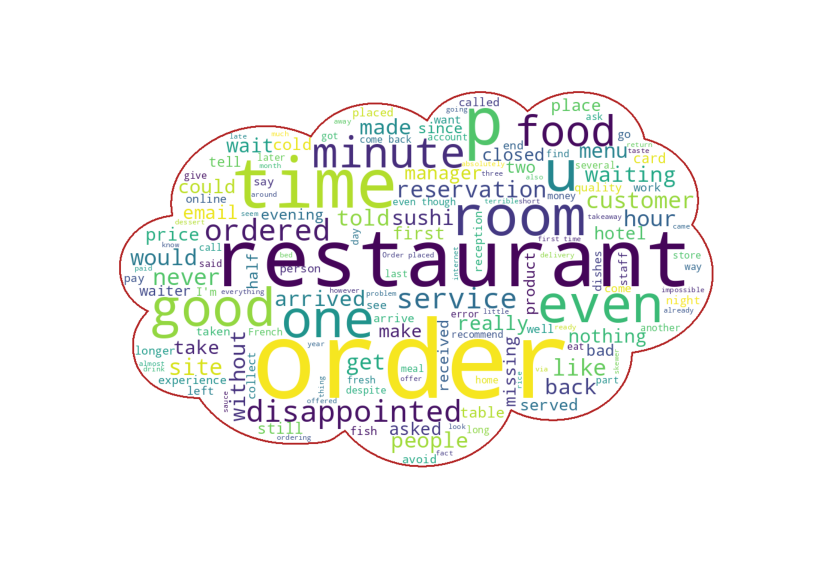

In [ ]:
# plot the WordCloud image
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_1)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

 Larger words such as "time," "food," "order," "service," "minute," "room," and "disappointed" are immediately noticeable, which suggests they are common points of concern among the reviewers.
<br>
The prominence of "time" alongside "minute," "wait," "arrived," and "hour" suggests that customers often mention long waiting times, either for service, food delivery, or possibly other services. The word "disappointed" is also quite large, indicating a general sentiment of dissatisfaction. Words related to the core of the hospitality or dining experience, such as "food," "order," "service," and "room," point to these being the areas that reviewers were most commonly dissatisfied with.
<br>
Words like "cold," "bad," "missing," and "wrong" could indicate specific issues with the food or orders, such as incorrect or unsatisfactory items being served. The word "never" being prominent could suggest that customers are asserting they would never return or had never experienced something negative like this before.
<br>

From this word cloud, it's clear that the 1-star reviews are centered around problems with service timing, food quality, and overall customer experience.

**Reviews with 2 stars**

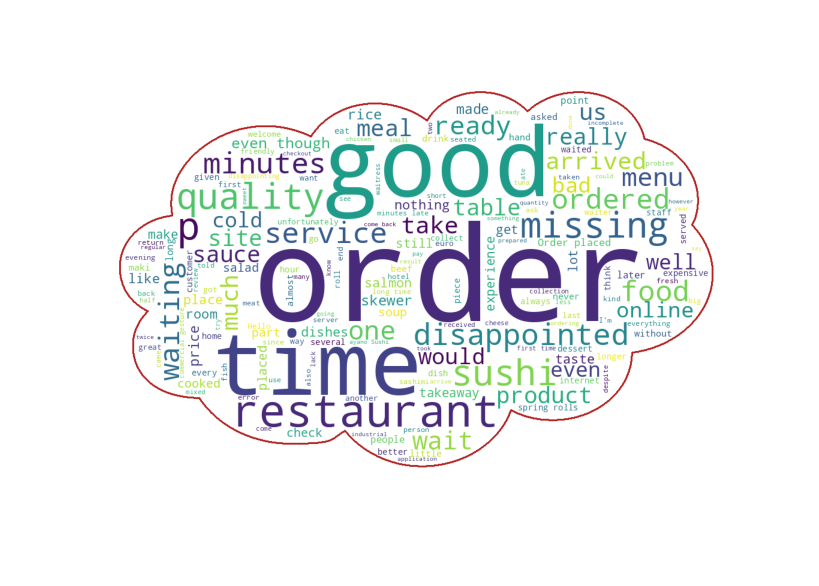

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

The large word "good" alongside "quality" and "service" suggests that some aspects of the experience were positive or at least had the potential to be, but were not enough to result in a high rating. "Order" and "time" being prominent could point to issues with order accuracy, preparation, or timeliness.
<br>
The words "cold," "missing," "ready," "wait," and "minutes" imply specific complaints: food not being hot upon serving, items not being included as expected, readiness of the order not meeting expectations, and longer than acceptable wait times. The presence of words like "disappointed" and "bad" clearly communicate negative experiences.
<br>
The presence of food items like "sushi," "salad," "cake," and "soup" alongside "cold" and "sauce" suggests that there might be specific complaints about these dishes, such as temperature or taste issues.

Overall, the 2-star reviews indicate a mixed sentiment where there is some acknowledgment of good aspects but overshadowed by significant issues that led to a lower rating. The issues seem to revolve around the expectations of service and food quality not being met.

**Reviews with 3 stars**

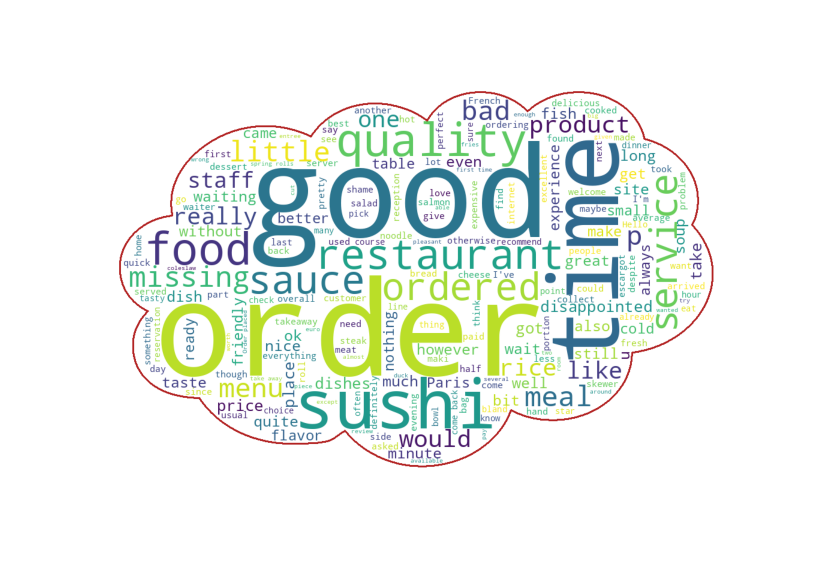

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_3)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

The size of "good" and "quality" suggests that customers found some aspects of their experience to be satisfactory, which is consistent with a mid-range rating like 3 stars. The word "missing" and "sauce" could point to specific issues with the food, such as incomplete orders or dishes not being served as expected.
<br>
"Service" and "staff" are prominent, which may indicate that service played a significant role in these reviews. However, these words do not have the same negative connotations as seen with lower ratings, suggesting that service might have been adequate but not exceptional.
<br>
The presence of words like "little," "better," and "really" could indicate that customers had specific suggestions for improvement or areas that needed a little more attention. Words like "nice," "taste," "flavor," and "menu" imply that there are redeeming qualities about the food and selection.

Overall, the 3-star reviews seem to convey a sentiment of an experience that met some expectations but left room for improvement. There might have been no major flaws, but also no particularly outstanding features to elevate the experience to a higher rating.

**Reviews with 4 stars**

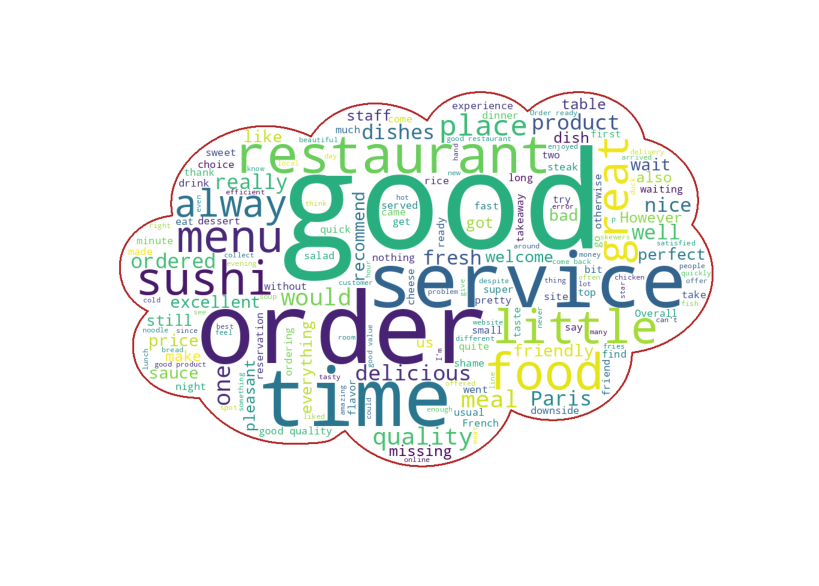

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_4)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

The larger words such as "good," "food," "service," "quality," "sushi," "delicious," "friendly," "excellent," and "restaurant" suggest these are the areas where the establishments received positive feedback.
<br>
The presence of words like "excellent," "delicious," "friendly," and "perfect" points to a high level of satisfaction with the food quality, taste, and customer service. These words, associated with positive experiences, are likely the main contributors to the high rating.
<br>
"Menu," "sushi," and "choice" imply that customers appreciated the variety and quality of the food offerings, specifically highlighting sushi, which could indicate a particular strength of the restaurant.
<br>
The words "would" and "without" are interesting because they might be part of phrases suggesting conditional praise or minor issues that, if addressed, could possibly turn the 4-star rating into 5 stars.
<br>
Despite the overall positive tone indicated by the large, positive words, the presence of "wait," "missing," "however," and "downside" suggests that there are some areas for improvement. These might relate to wait times, occasional missing elements, or small issues that prevented a perfect score.

**Reviews with 5 stars**

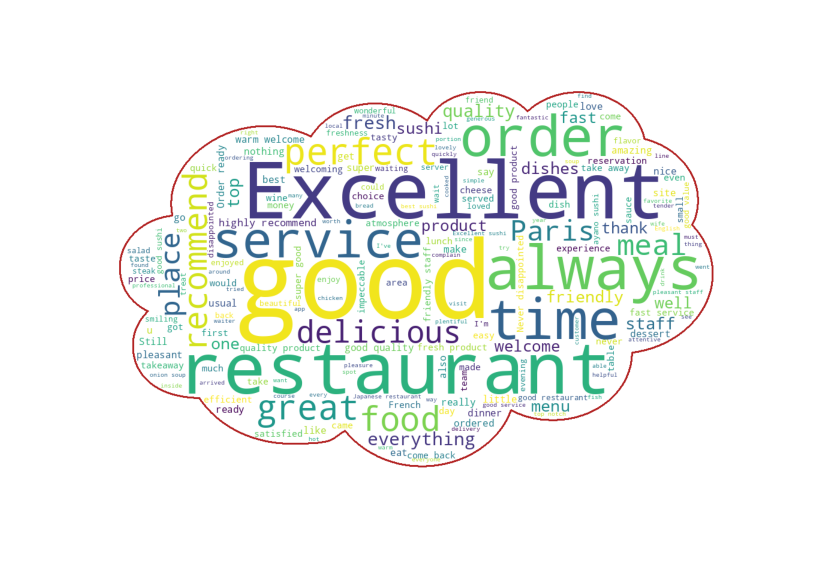

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_5)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Prominent words like "excellent," "perfect," "delicious," "best," "great," "friendly," "service," "food," "quality," and "restaurant" highlight the overwhelmingly positive feedback from customers.
<br>
The size and frequency of words like "perfect" and "excellent" indicate a very high level of satisfaction. These terms, along with "delicious" and "best," suggest that the food and overall experience met or exceeded customer expectations.
<br>
Words such as "friendly" and "service" are associated with positive interactions with staff and the service provided. This indicates that high-quality customer service was a significant factor in the customers' positive experiences.
<br>
The word "always" could be part of phrases that suggest consistent quality and service, which is a strong positive signal for any establishment.
<br>
Other words like "Paris," "atmosphere," "recommend," and "come back" suggest that the location, ambiance, and overall impression were good enough for customers to not only recommend the place but also to consider returning.

In this context, the 5-star reviews likely reflect an exceptional dining experience, where customers felt that all aspects of their visit – from the food and service to the ambiance and location – were excellent. The word cloud indicates that customers left these reviews feeling highly satisfied and likely to return and recommend the restaurant to others.

**Most common words from all reviews**

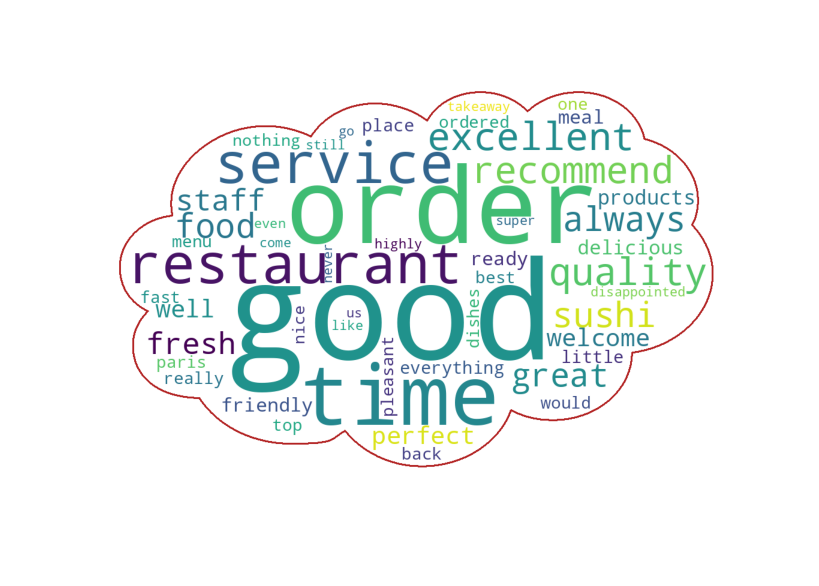

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import pandas as pd
from keras.preprocessing.text import Tokenizer

# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', punctuation)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

# Apply the cleaning function to the 'Review' column
cleaned_reviews = list(df['Review'].apply(clean_text))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_reviews)

col_names = list(tokenizer.word_index)

word_bag = tokenizer.texts_to_matrix(cleaned_reviews, mode='binary')
word_bag_df = pd.DataFrame(word_bag)
word_bag_df.columns = ["dummy"] + col_names
keywords = pd.DataFrame(word_bag_df.sum().sort_values(ascending=False)).head(50)
keywords_dict=keywords.to_dict()[0]
cloud_of_words = WordCloud(background_color="white", mask=wine_mask,
                contour_width=3, contour_color='firebrick').generate_from_frequencies(keywords_dict)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud_of_words)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

The prevalence of positive terms such as "excellent," "good," "friendly," and "perfect" suggests that many customers had a positive view of their experience, food quality, and the service they received. This could indicate that the restaurant generally meets customer expectations, with standout features being the quality of the food, particularly sushi, and the level of service.
<br>
The word "recommend" is quite prominent, implying that customers often suggest the restaurant to others, which is a positive sign of customer satisfaction and potential repeat business.
<br>
The mix of words from "excellent" to "disappointed" suggests a range of experiences. While the positive terms dominate, the presence of a word like "disappointed" indicates that not all experiences were perfect, which is to be expected in a dataset spanning all review ratings.

In [ ]:
cloud_of_words.to_file("cloud_all_reviews.png")

## V. Sentiment Analysis

#### Preprocessing

- We define of a custom list of stopwords and remove certain specific stopwords like 'not', 'no', 'but', and "won't". <br>

- We define a text preprocessing function preprocess(text) that tokenizes the text, removes punctuation, converts words to lowercase, removes custom stopwords, and filters out short words. The processed text is then rejoined into a single string. <br>

- We apply the preprocess function to the 'Review' column in the DataFrame 'df' and store the preprocessed text in a new column called 'Processed_Review'. <br>

In [ ]:
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Download NLTK stopwords data (if not already downloaded)
nltk.download('stopwords')

# Define the words to remove
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('not')
custom_stopwords.discard('no')
custom_stopwords.discard('but')
custom_stopwords.discard("won't")

def preprocess(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', punctuation)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    # Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]

    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Processed_Review'] = df['Review'].apply(preprocess)

#### Vectorization

- We import TfidfVectorizer from scikit-learn to convert the preprocessed text into a TF-IDF matrix representation. Limit the maximum number of features to 5000. <br>

- We transform the 'Processed_Review' column into a TF-IDF matrix 'X' using the TfidfVectorizer. <br>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Processed_Review']).toarray()

#### Labels Definition

- We define a mapping function map_sentiments(sentiment) to convert 'Sentiment' labels to binary values (1 for 'Positive', 0 for both 'Negative' and 'Neutral'). <br>

- We apply the map_sentiments function to the 'Sentiment' column and store the result in 'y'. <br>

In [ ]:
def map_sentiments(sentiment):
    if sentiment == 'Positive':
        return 1
    else:  # This covers both 'Negative' and 'Neutral'
        return 0

# Apply the function to the 'Sentiment' column
y = df['Sentiment'].apply(map_sentiments)

#### Resampling

- We import SMOTE (Synthetic Minority Over-sampling Technique) from the imbalanced-learn library to address class imbalance by oversampling the minority class (Negative). <br>

- We calculate the number of samples in the positive class and define a sampling strategy to match this count for the negative class and apply SMOTE to balance the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import *

# For example, to match the number of samples in the positive class:
target_negative_count = y.value_counts()[1]  # number of samples in the positive class

# Define the sampling strategy
sampling_strategy = {0: target_negative_count}  # 0 corresponds to the 'Negative' class

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy)
X, y = smote.fit_resample(X, y)

We create a pie chart using Plotly Express to visualize the distribution of sentiment classes after applying SMOTE.

In [ ]:
import plotly.express as px

# Assuming y is your labels series with the mapped values
Y_count = y.value_counts()

# Preparing data for Plotly
data = {
    'Sentiment': ['Negative', 'Positive'],
    'Count': [Y_count[0], Y_count[1]]
}

# Create the pie chart
fig = px.pie(data,
             names='Sentiment',
             values='Count',
             title='Sentiment Class Proportion after Oversampling',
             color='Sentiment',
             color_discrete_map={'Negative':'#ff9999', 'Positive':'#66b3ff'})

fig.show()


As we can see, we have now a balanced dataset.

#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training

- We import various classification models from scikit-learn, including Logistic Regression, Naive Bayes, Support Vector Machine, Decision Tree, Random Forest, and K-Nearest Neighbors. <br>

- We train each model on the training data and evaluate its accuracy on the testing data. The best-performing model is determined based on accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Training and Evaluation with Cross-Validation
best_model_name = None
best_score = 0

for name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Compute the average accuracy
    accuracy = np.mean(scores)

    print(f"{name}: Average Cross-Validation Accuracy = {accuracy:.4f}")

    if accuracy > best_score:
        best_model_name = name
        best_score = accuracy

As Logistic Regression has the best cross validation accuracy, we : <br>
- Created a Logistic Regression model and train it on the training data.<br>

- Saved the trained model using pickle for future use in our streamlit app.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
import pickle

# Save the model to a file using pickle to use it in sreamlit
with open('sentiment_analysis_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

#### Model Evaluation

We make predictions using the SVM model on the testing data and calculate the accuracy of the model's predictions.

In [ ]:
# Making predictions
predictions = model.predict(X_test)

# Evaluating performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.9267


We compute the confusion matrix for the model's predictions and create a heatmap using seaborn to visualize the true and predicted labels.

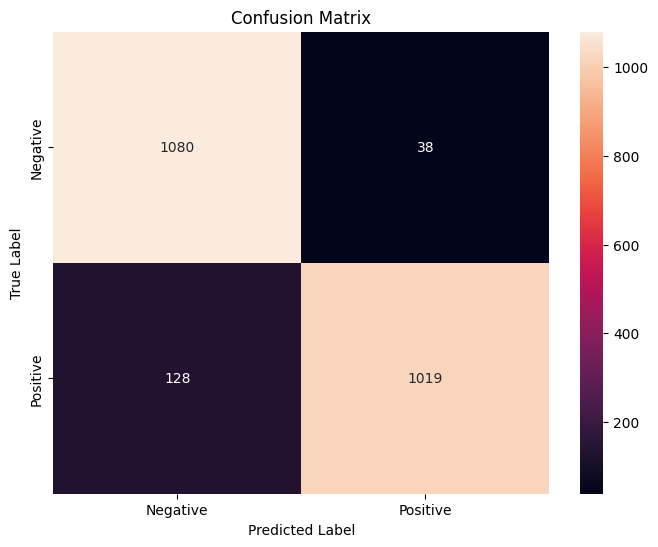

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)


# Define the labels for the plot based on your encoding
labels = ['Negative', 'Positive']

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can infer that the model is performing quite well, with a high number of correct predictions (TP + TN). The model has a relatively low rate of both false positives and false negatives, indicating both good precision and recall. Precision is a measure of the accuracy provided that a specific class has been predicted (the number of correct positive predictions divided by the total number of positive predictions), and recall is a measure of the ability of the model to find all the relevant cases within a dataset.
<br>
Overall, the model seems to be balanced and effective in distinguishing between the positive and negative classes.

#### Sentiment Prediction

We provided examples of predicting sentiment for new reviews : <br>
- Preprocess a new review.<br>
- Convert the preprocessed review into a TF-IDF vector.<br>
- Use the SVM model to predict the sentiment label ('Positive' or 'Negative') and the associated probability score.

In [ ]:
new_review = "The food was disgusting"
processed_review = preprocess(new_review)
vectorized_review = tfidf_vectorizer.transform([processed_review]).toarray()
sentiment = model.predict(vectorized_review)
print('Predicted Sentiment:', 'Positive' if sentiment == 1 else 'Negative' if sentiment == 0 else 'Neutral')


Predicted Sentiment: Negative


In [ ]:
new_review = "The food was amazing"
processed_review = preprocess(new_review)
vectorized_review = tfidf_vectorizer.transform([processed_review]).toarray()
sentiment = model.predict(vectorized_review)
print('Predicted Sentiment:', 'Positive' if sentiment == 1 else 'Negative' if sentiment == 0 else 'Neutral')


Predicted Sentiment: Positive


In [ ]:
new_review = "I do not recommand"
processed_review = preprocess(new_review)
vectorized_review = tfidf_vectorizer.transform([processed_review]).toarray()
sentiment = model.predict(vectorized_review)
print('Predicted Sentiment:', 'Positive' if sentiment == 1 else 'Negative' if sentiment == 0 else 'Neutral')


Predicted Sentiment: Negative


## VI. Topic Modeling and Lists of Topics

#### LDA

- We define a function compute_lda_for_restaurant to compute Latent Dirichlet Allocation (LDA) for a collection of restaurant reviews. It adjusts the parameters min_df and max_df based on the number of documents and uses CountVectorizer to convert the text data into a document-term matrix. It then fits an LDA model to discover topics within the reviews. <br>

- We define a function get_top_phrases to extract the top phrases from each topic generated by the LDA model. <br>

- We create a DataFrame named results_df to store the results, including restaurant names, average ratings, individual reviews, and the topics associated with each review. <br>

- We iterate through unique restaurant names in the input DataFrame data. For each restaurant, calculate its average rating and apply the compute_lda_for_restaurant function to generate an LDA model and extract top phrases. <br>

- For each review within a restaurant, we append a row to results_df containing restaurant name, average rating, the review itself, and the topics associated with the review. <br>

The final result is a DataFrame results_df containing restaurant-specific topic information for each review.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')


def compute_lda_for_restaurant(reviews, n_components=10):
    n_docs = len(reviews)

    # Adjust min_df and max_df based on the number of documents
    min_df = 1  # This can be a fixed number if you have a small dataset
    max_df = 0.8 if n_docs > 10 else 1.0  # Adjust max_df to 1.0 if you have fewer than 10 documents


    count_vect = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english')
    doc_term_matrix = count_vect.fit_transform(reviews.values.astype('U'))

    if doc_term_matrix.shape[1] == 0:  # Check if no terms remain
        return None, None

    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    lda.fit(doc_term_matrix)
    return lda, count_vect


def get_top_phrases(lda_model, count_vect, n_top_words=2):
    keywords = count_vect.get_feature_names_out()
    top_phrases = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_phrases.append(" ".join([keywords[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return top_phrases


data = df

# Prepare DataFrame to store results
results_df = pd.DataFrame(columns=['Restaurant', 'AverageRating', 'Review', 'Topics'])

for restaurant in data['Restaurant'].unique():
    restaurant_data = data[data['Restaurant'] == restaurant]
    average_rating = restaurant_data['Rating'].mean()
    lda_model, count_vect = compute_lda_for_restaurant(restaurant_data['Review'])

    if lda_model is None or count_vect is None:  # Check if LDA model was not created
        continue

    top_phrases = get_top_phrases(lda_model, count_vect)

    for _, row in restaurant_data.iterrows():
        results_df = results_df.append({
            'Restaurant': restaurant,
            'AverageRating': average_rating,
            'Review': row['Review'],
            'Topics': "; ".join(top_phrases)
        }, ignore_index=True)

results_df


Restaurant  AverageRating  \
0     ayakosushi       4.435299   
1     ayakosushi       4.435299   
2     ayakosushi       4.435299   
3     ayakosushi       4.435299   
4     ayakosushi       4.435299   
...          ...            ...   
6686   Khajuraho       4.700000   
6687   Khajuraho       4.700000   
6688   Khajuraho       4.700000   
6689   Khajuraho       4.700000   
6690   Khajuraho       4.700000   

                                                                                                                                                                                                                                                                                                                                                                                                                                  Review  \
0                                                                                                                                                                                                                                                                                                                                                                                                      Excellent dishes, quality service   
1                                                                                                                                                                                                                                                                                                                                                                   Staff very dry :(Skewers very average summary : average sushi place.   
2                                                                                                                                                                                                                                                                                                                It most tasty sushi I tried this year, just wow! U guys know how to provide good service with excellent taste of food!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                 Food is goodIt's price   
4                                                                                                                                                                                                                                                                                                                                                                                                    REAT!!! U know how to cook!! the :)   
...                                                                                                                                                                                                                                                                                                                                                                                                                                  ...   
6686                                                                                                                                                                                                                                                                                          Wow.. this place has amazing food! If you're craving great Indian food with nice ambience & attentive, kind waitstaff.. this is the place!   
6687  After 7 days of French food, we decided to switch it up!Amazing Northern Indian cuisine - I've never had elegant Indian food, this was a hint of spice - ab

In [ ]:
results_df.to_csv("lda_results.csv", index=False)

#### "Read reviews that mention..." feature

We save the result in a csv file to implement a "Read reviews that mention" feature in our streamlit app :

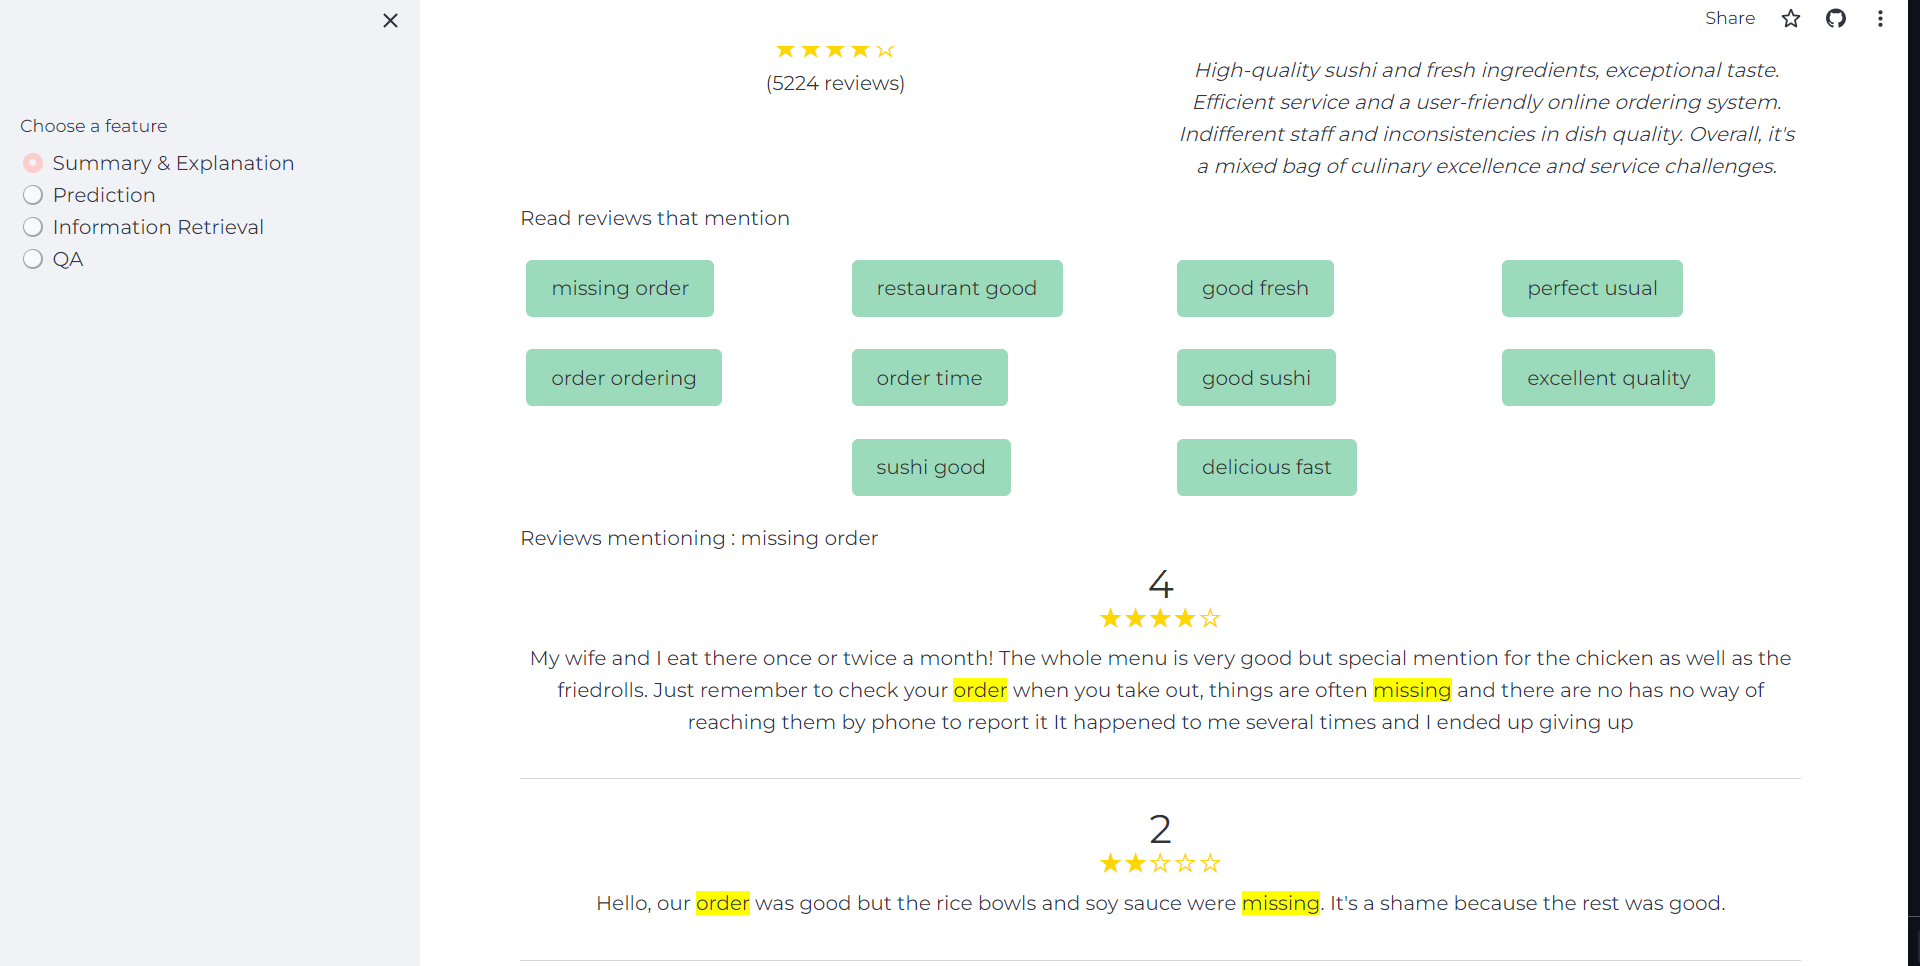

[Our Streamlit App](https://project2nlp.streamlit.app/)

#### pyLDAVis

- We define a preprocessing function preprocess_lda that tokenizes text, removes punctuation, converts text to lowercase, filters out non-alphabetic tokens, and removes custom stopwords.<br>

- We define a function compute_lda_gensim to train a Latent Dirichlet Allocation (LDA) model using Gensim. This function preprocesses the input reviews, creates a dictionary of terms, vectorizes the documents, and trains the LDA model with a specified number of topics.<br>

- We apply the compute_lda_gensim function to a sample restaurant's reviews, creating an LDA model, a corpus, and a dictionary.<br>

- Finally we visualize the topics generated by the LDA model using pyLDAvis, an interactive tool for exploring topic models. The code prepares the data for visualization and displays the topics for further analysis.

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

def preprocess_lda(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation
    table = str.maketrans('', '', punctuation)
    tokens = [word.translate(table) for word in tokens]
    # Remove non-alphabetic tokens and lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Custom stopwords
    custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'but', "won't"}
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 1]
    return tokens  # Return a list of tokens instead of a string


# Function to train LDA model using Gensim
def compute_lda_gensim(reviews, num_topics=10):
    # Apply preprocessing to each review
    tokenized_reviews = [preprocess_lda(review) for review in reviews]

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_reviews)
    dictionary.filter_extremes(no_below=1, no_above=0.5)

    # Vectorize the documents
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_reviews]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    return lda_model, corpus, dictionary

# usage on first restaurant
sample_restaurant = df['Restaurant'].unique()[0]
restaurant_data = df[df['Restaurant'] == sample_restaurant]
lda_model, corpus, dictionary = compute_lda_gensim(restaurant_data['Review'])

# Visualize the topics
pyLDAvis_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(pyLDAvis_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## VII. Embedding to Identify Similar Words

#### Preprocessing

We define a preprocessing function that tokenizes text, removes punctuation, converts text to lowercase, removes custom stopwords, and filters out short words and a clean_dataframe function to clean the DataFrame by dropping rows with missing reviews and adding a new column 'Cleaned_Review' containing preprocessed reviews.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Download NLTK stopwords data (if not already downloaded)
nltk.download('stopwords')

# Define the words to remove
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('not')
custom_stopwords.discard('no')
custom_stopwords.discard('but')
custom_stopwords.discard("won't")

def preprocess(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', punctuation)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    # Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]

    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)


# Clean the DataFrame
def clean_dataframe(data):
    data = data.dropna(subset=['Review'])
    data['Cleaned_Review'] = data['Review'].apply(preprocess)
    return data

data = clean_dataframe(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Word2vec

We create a function build_corpus to build a list of tokenized sentences from the cleaned data. We then Build a corpus using the build_corpus function, which contains tokenized sentences. Finally, we train a Word2Vec model using Gensim on the created corpus, specifying vector size, window size, minimum count, and the number of workers. We save the trained model for future use in our streamlit app.

In [ ]:
# Build corpus
def build_corpus(data):
    corpus = []
    for sentence in data['Cleaned_Review']:
        word_list = sentence.split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data)

# Train Word2Vec model
model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=1, workers=4)

In [ ]:
# Save the model to implement in our streamlit app
model.save("word2vec.model")

#### Visualization of Embeddings (Matplotlib & Tensorboard)

We import TensorFlow and prepare the model for visualization using TensorBoard. Also, we use t-SNE to create a 2D plot of word embeddings, save it as an image, and visualize the embeddings with TensorBoard.

<ipython-input-25-283ca383fcac>:62: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  plt.savefig(os.path.join(log_dir, 'tsne_plot.png'))
<ipython-input-25-283ca383fcac>:62: UserWarning: Glyph 21345 (\N{CJK UNIFIED IDEOGRAPH-5361}) missing from current font.
  plt.savefig(os.path.join(log_dir, 'tsne_plot.png'))
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21345 (\N{CJK UNIFIED IDEOGRAPH-5361}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


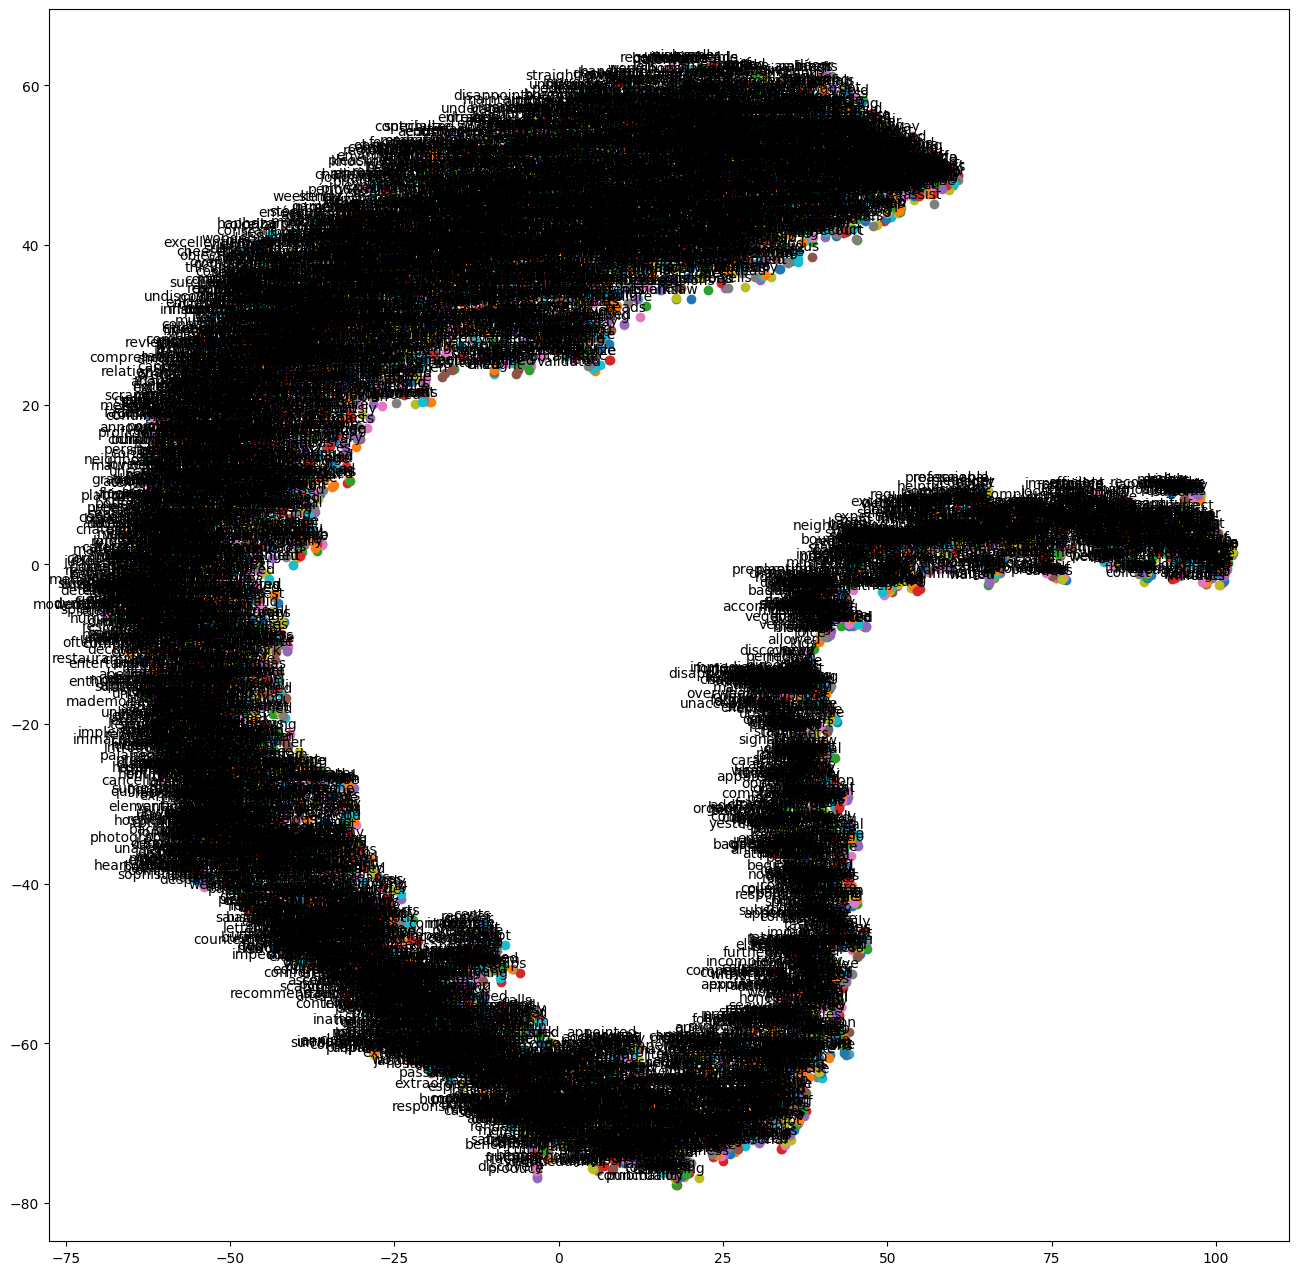

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
from tensorboard.plugins import projector
import os
import matplotlib.pyplot as plt

# Define the directory for TensorBoard logs
log_dir = 'logs'

# Visualize embeddings using t-SNE
def tsne_tensorboard_plot(model, log_dir):
    labels = []
    tokens = []

    # Ensure that we import numpy
    import numpy as np

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)  # Convert the list to a NumPy array

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    # Create a directory for TensorBoard logs
    tf.io.gfile.makedirs(log_dir)

    # Set up the embedding writer for TensorBoard
    # Use the TensorFlow 2.X API for writing summaries
    embedding_var = tf.Variable(tokens, name='word2vec_embeddings', trainable=False)
    checkpoint = tf.train.Checkpoint(embedding=embedding_var)
    checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

    # Set up the config for the projector
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_var.name
    embedding.metadata_path = 'metadata.tsv'  # Ensure this file is in `log_dir`

    # Write labels to the metadata file
    with open(os.path.join(log_dir, 'metadata.tsv'), 'w', encoding='utf-8') as f:
        for label in labels:
            f.write(f"{label}\n")

    # Save the projector config file
    projector.visualize_embeddings(log_dir, config)

    # Create a TSNE plot and save as an image
    plt.figure(figsize=(16, 16))
    for i, label in enumerate(labels):
        x, y = new_values[i, 0], new_values[i, 1]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(os.path.join(log_dir, 'tsne_plot.png'))
    plt.show()

tsne_tensorboard_plot(model, log_dir)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs


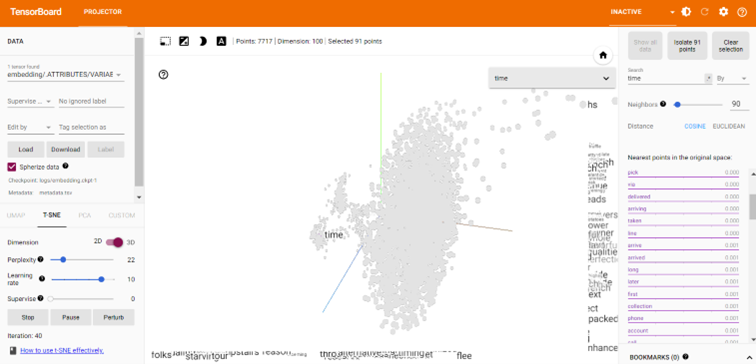

#### Implementation of Cosine Distance

We define a function cosine_distance to calculate the cosine distance between two words in the Word2Vec model.

In [ ]:
from scipy.spatial import distance

def cosine_distance(model, word1, word2):
    return distance.cosine(model.wv[word1], model.wv[word2])



#### Semantic Search

We create a semantic search function  that takes a query, a list of documents, and an optional top N parameter. The function tokenizes documents, calculates TF-IDF scores, processes the query, and computes document similarity scores based on the cosine distance. It returns a sorted list of document similarity scores for the given query.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from numpy import mean, zeros
from scipy.spatial.distance import cosine
from gensim.models import Word2Vec

def semantic_search(query, documents, top_n=10):
    # Tokenize documents
    model = Word2Vec.load("word2vec.model")
    tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
    flattened_docs = [word for doc in tokenized_documents for word in doc if word in model.wv]


    # Calculate TF-IDF scores
    tfidf = TfidfVectorizer(vocabulary=model.wv.key_to_index)
    tfidf.fit([" ".join(flattened_docs)])
    tfidf_scores = {word: tfidf.idf_[i] for word, i in tfidf.vocabulary_.items()}

    # Process query
    query_tokens = word_tokenize(query.lower())
    query_vectors = [model.wv[word] * tfidf_scores.get(word, 1) for word in query_tokens if word in model.wv]

    if not query_vectors:
        return []

    query_vector = mean(query_vectors, axis=0)

    scores = []
    for doc, doc_tokens in zip(documents, tokenized_documents):
        doc_vectors = [model.wv[word] * tfidf_scores.get(word, 1) for word in doc_tokens if word in model.wv]

        if doc_vectors:
            doc_vector = mean(doc_vectors, axis=0)
            similarity = 1 - cosine(query_vector, doc_vector)  # cosine returns the distance, so we subtract from 1
            scores.append((doc, similarity))

    return sorted(scores, key=lambda x: x[1], reverse=True)[:top_n]

documents = df['Review'].tolist()
semantic_search_results = semantic_search(model, "good sushi", documents)

In [ ]:
semantic_search_results

[('Very good sushi', 1),
 ('Very good sushi, I enjoyed it', 0.9999289512634277),
 ('Very good sushi, very fair price and quantity!!!', 0.9998478293418884),
 ('sushi really good quality service…sushi really good quality service but slightly high price',
  0.9998199343681335),
 ('Very good! Very good sushi and sashimi!', 0.9997877478599548)]

## VIII. QA System

For the QA system, we have developped a chatbot assistant using into our Streamlit app for interacting with users regarding restaurant-related questions. The chatbot maintains a conversation history, displays chat bubbles, and processes user questions to provide restaurant recommendations and information based on a restaurant review dataset.

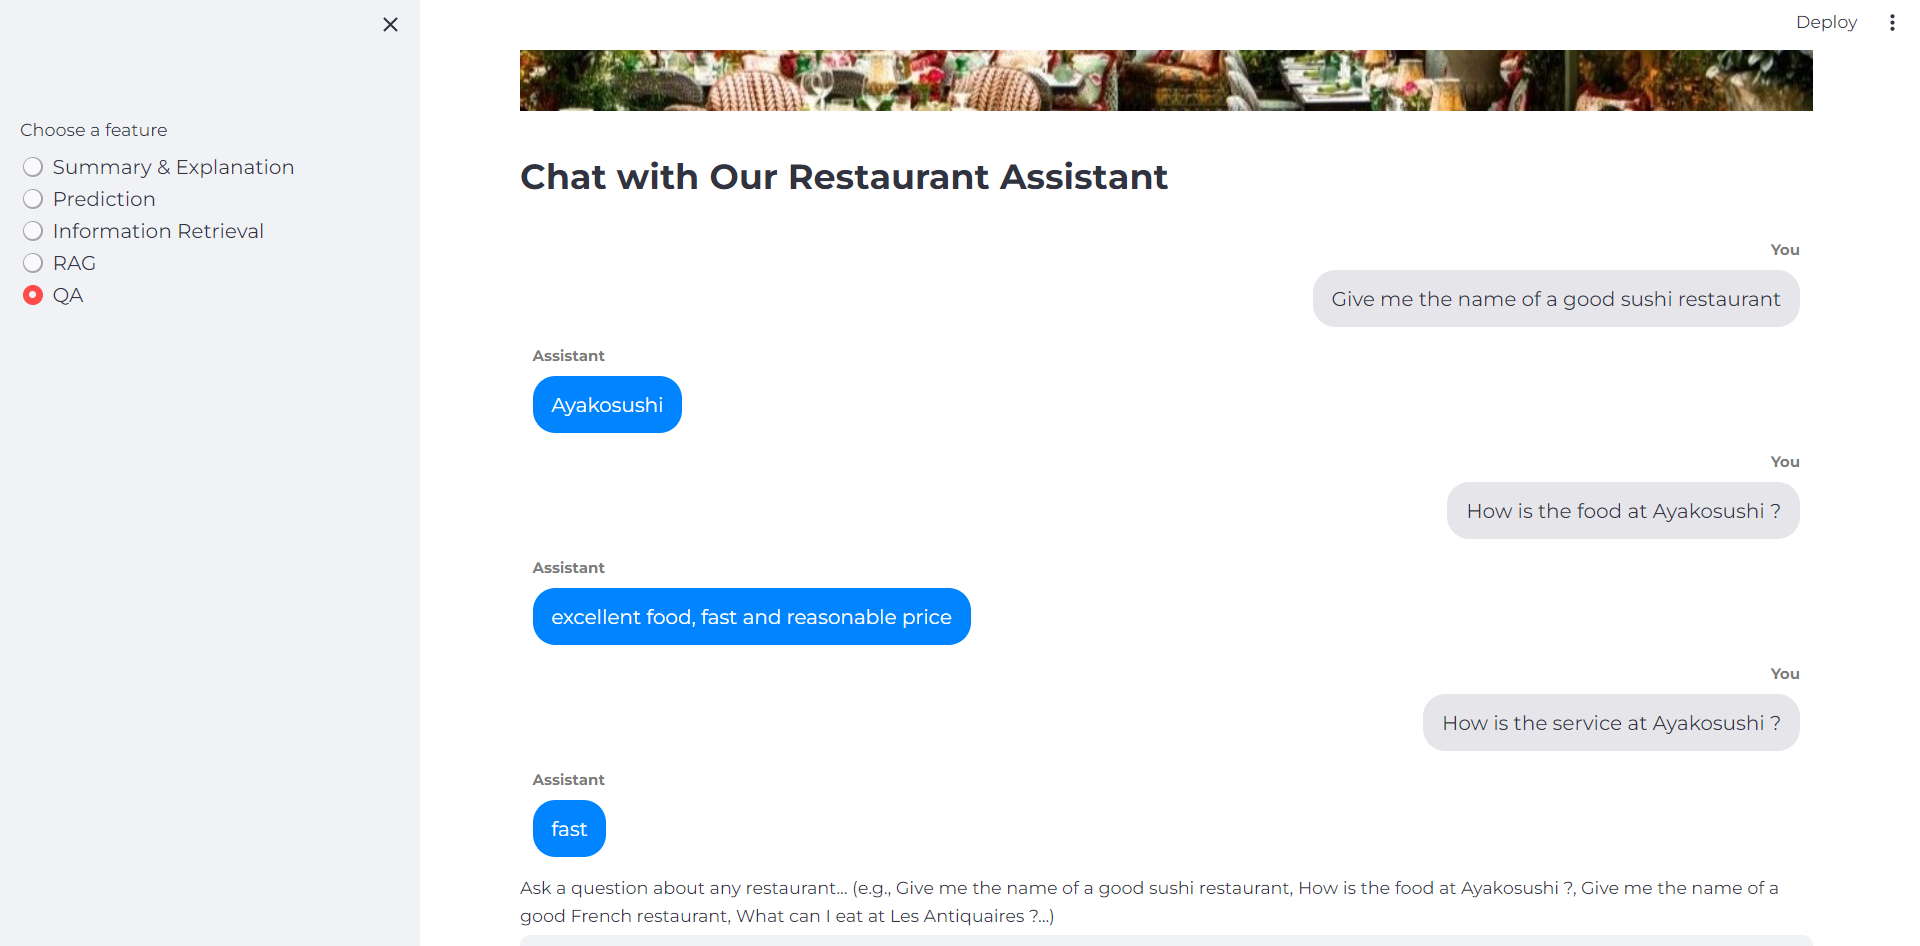

[Our Streamlit App](https://project2nlp.streamlit.app/)

In [ ]:
import streamlit as st

# Function to display conversation
def display_conversation(conversation):
    for exchange in conversation:
        st.text_area("You", value=exchange['question'], height=40, disabled=True, key=f"q{exchange['id']}")
        st.text_area("Assistant", value=exchange['answer'], height=60, disabled=True, key=f"a{exchange['id']}")

def clear_input():
    # Clear the input box by setting the value to an empty string
    st.session_state.question = ""

def QASystem():
    st.title("Chat with Our Restaurant Assistant")

    # Chat bubble styling with labels on opposite sides
    chat_bubble_css = """
    <style>
        .chat-container {
            display: flex;
            flex-direction: column;
            width: 100%;
            margin-bottom: 0.5rem;
        }
        .chat-bubble {
            padding: 10px 15px;
            border-radius: 18px;
            margin: 5px 10px;
            display: inline-block;
            max-width: 70%;
            word-wrap: break-word;
        }
        .user-bubble {
            background-color: #e6e6ea;
            align-self: flex-end;
        }
        .assistant-bubble {
            background-color: #0084ff;
            color: white;
            align-self: flex-start;
        }
        .label {
            font-size: 12px;
            font-weight: bold;
            margin-bottom: 2px;
            color: #7c7c7c;
        }
        .user-label {
            align-self: flex-end;
            text-align: right;
            padding-right: 10px;
        }
        .assistant-label {
            align-self: flex-start;
            text-align: left;
            padding-left: 10px;
        }
    </style>
    """

    # Apply the chat bubble styling
    st.markdown(chat_bubble_css, unsafe_allow_html=True)

    # Initialize conversation state
    if 'conversation' not in st.session_state:
        st.session_state.conversation = []

    # Display conversation history with chat bubbles
    for exchange in st.session_state.conversation:
        st.markdown(
            f'<div class="chat-container">'
            f'    <div class="label user-label">You</div>'
            f'    <div class="chat-bubble user-bubble">{exchange["question"]}</div>'
            f'</div>',
            unsafe_allow_html=True,
        )
        st.markdown(
            f'<div class="chat-container">'
            f'    <div class="label assistant-label">Assistant</div>'
            f'    <div class="chat-bubble assistant-bubble">{exchange["answer"]}</div>'
            f'</div>',
            unsafe_allow_html=True,
        )


    # Static placeholder for the input field
    placeholder_text = (
            "Ask a question about any restaurant... (e.g., Give me the name of a good sushi restaurant, "
            "How is the food at Ayakosushi ?, Give me the name of a good French restaurant, "
            "What can I eat at Les Antiquaires ?...)"
        )


    # Input for new question with static placeholder
    question = st.text_input(placeholder_text, key="question_input")

    # Handling the question input
    if st.button("Send"):
        if question:
            # Create a dictionary to map reviews back to their restaurants
            review_to_restaurant = {row['Review']: row['Restaurant'] for _, row in data.iterrows()}

            # Get all reviews
            reviews = data['Review'].tolist()

            # Perform semantic search to find relevant reviews
            relevant_reviews = semantic_search(question, reviews, top_n=10)

            # Concatenate relevant reviews with their corresponding restaurant names
            relevant_reviews_text = ' '.join([f"{review_to_restaurant[review]}: {review}" for review, _ in relevant_reviews])

            # Get the answer from the QA pipeline
            answer = qa_pipeline({'question': question, 'context': relevant_reviews_text})

            # Add the exchange to the conversation history
            st.session_state.conversation.append({
                'question': question,
                'answer': answer['answer']  # The answer obtained from the QA pipeline
            })

            # Clear the input box after sending the message
            clear_input()

            # Rerun the app to update the conversation display
            st.experimental_rerun()
        else:
            st.write("Please ask a question.")

- We apply CSS styling to format chat bubbles with labels for the user and the assistant. <br>

- We display a conversation history, showing the user's questions and the assistant's responses as chat bubbles. <br>

- The chatbot allows users to input questions about restaurants in a text field. <br>



When the user clicks the "Send" button, the chatbot performs the following steps:<br>

- Maps restaurant reviews to their respective restaurants.
Retrieves all restaurant reviews. <br>
- Conducts semantic search to find relevant reviews based on the user's question. <br>
- Concatenates relevant reviews with their restaurant names.
- Passes the user's question and relevant reviews to a Question-Answering (QA) model. <br>
- Appends the user's question and the model's answer to the conversation history. <br>
- Clears the input box and updates the conversation display.
If the user does not provide a question and clicks "Send," a message prompts them to ask a question. <br>


## IX. Summary

- We first imported necessary libraries, including the Transformers library for natural language processing tasks. <br>

- We grouped and concatenated restaurant reviews to create a summary for each restaurant. The reviews for each restaurant are combined into a single text. <br>

- We chose a Seq2Seq model for text summarization, such as BART or T5. <br>

- We loaded the selected model and its associated tokenizer. <br>

- We defined a function called summarize_reviews to generate summaries for the concatenated restaurant reviews. The function tokenizes the input text, generates a summary, and decodes the output to obtain the final summary. <br>

- We applied the summarize_reviews function to each restaurant's concatenated reviews, producing a summary for each restaurant. <br>

- Finally we displayed the generated summaries alongside the restaurant names in a DataFrame. <br>

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


# Group and concatenate reviews by restaurant
grouped_reviews = df.groupby('Restaurant')['Review'].apply(lambda reviews: ' '.join(reviews)).reset_index()

# Choose a Seq2Seq model like BART
model_name = "facebook/bart-large-cnn"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def summarize_reviews(reviews, max_length=150):
    # Tokenize and generate summary
    inputs = tokenizer.encode("summarize: " + reviews, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=max_length, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Generate summaries for each restaurant
grouped_reviews['Summary'] = grouped_reviews['Review'].apply(summarize_reviews)

# Display the summaries
grouped_reviews

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Restaurant  \
0                  1995   
1             20 Eiffel   
2              Angelina   
3        Arnaud Nicolas   
4     Au Vieux Comptoir   
..                  ...   
120        restopolitan   
121           superchef   
122                 www   
123               zitti   
124  万食如意 Fresh Noodles   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

We saved the results into a csv file to implement in our streamlit app.


In [ ]:
grouped_reviews.to_csv('summary_reviews_restaurants.csv',index=False)

## X. Supervised Learning

The first step was to process text data in order to apply a classification model, typically used in review analysis. <br>

- The script begins by importing the necessary libraries. <br>

- Next TfidfVectorizer is used to transform textual reviews into TF-IDF vectors, a numerical representation that reflects the importance of words in documents and in the corpus as a whole. The max_features=10000 parameter limits the number of words to be considered to the 10,000 most frequent. <br>

- Then the labels (here, the ratings in the Rating column of the df DataFrame) are encoded using OneHotEncoder. This transforms the ratings into binary vectors, suitable for multiclass classification. <br>

- After SMOTE (Synthetic Minority Over-sampling Technique) is used to oversample the minority classes in the data. This creates new synthetic samples to balance the distribution of classes in the case of a desampled dataset. <br>

- Finally, the transformed and balanced data is split into training and test sets using train_test_split, with 80% of the data used for training and 20% for testing. The random_state=42 ensures that the split is reproducible. <br>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Download NLTK stopwords data (if not already downloaded)
nltk.download('stopwords')

# Define the words to remove
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('not')
custom_stopwords.discard('no')
custom_stopwords.discard('but')
custom_stopwords.discard("won't")

def preprocess(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', punctuation)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    # Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]

    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

df['Processed_Review'] = df['Review'].apply(preprocess)

# After you have created and fit the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['Processed_Review']).toarray()
y = df['Rating']

# Fit the encoder with your ratings
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[['Rating']])

# Apply SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Classical ML model

Secondly, it was interesting to test two different machine learning models for a classification task. Two different classification models are studied here, LightGBM. The aim is to obtain the best accuracy. <br>

LightGBM Model: <br>

- An LGBMClassifier model from the LightGBM library is created with the parameter is_unbalance=True. This parameter indicates that the model should adjust its behaviour to take account of the class imbalance in the data. The model is then trained on the training set (X_train, y_train). <br>
- After training, the model is used to predict labels on the test set (X_test). The accuracy of the predictions is calculated by comparing the predictions (y_pred) with the true labels (y_test) and displayed. <br>




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creating and training the Random Forest model
lgbm_model = LGBMClassifier(is_unbalance=True)
lgbm_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = lgbm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.612386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124999
[LightGBM] [Info] Number of data points in the train set: 17960, number of used features: 2818
[LightGBM] [Info] Start training from score -1.607213
[LightGBM] [Info] Start training from score -1.611389
[LightGBM] [Info] Start training from score -1.601673
[LightGBM] [Info] Start training from score -1.611668
[LightGBM] [Info] Start training from score -1.615301
Accuracy: 0.9195991091314031


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVC Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Evaluation
y_pred = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9505567928730512


#### Neural Network model

We create and fit a TF-IDF Vectorizer onvert text data into a numerical and save it for later use in our streamlit app.

In [ ]:
import pickle

# After you have created and fit the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['Processed_Review']).toarray()
y = df['Rating']

# Now save the fitted tfidf vectorizer to a file
with open('tfidf_vectorizer_rating.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

OneHotEncoder is used to convert categorical ratings into one-hot encoded format and save it for later use in our streamlit app.

In [ ]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder with your ratings
encoder.fit(df[['Rating']])

# Save the encoder to a file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


We first import necessary libraries for data preprocessing and building a neural network model. We tokenize text data with a vocabulary size of 10,000 words and a maximum sequence length of 100. We then apply SMOTE to balance the dataset and split it into training and testing sets. Next, we create a neural network model with embedding, dense, and dropout layers. The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. After training the model for 50 epochs, we evaluate its performance on the test set, displaying the loss and validation accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Tokenize the text data
max_words = 10000  # Maximum number of words in your vocabulary
maxlen = 100  # Define the maximum length of your input sequences

# Apply SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=maxlen))  # Embedding layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Loss on Test Set: {loss}, Validation Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
281/281 [==============================] - 20s 63ms/step - loss: 0.7233 - accuracy: 0.7290 - val_loss: 0.2630 - val_accuracy: 0.8922
Epoch 2/50
281/281 [==============================] - 13s 48ms/step - loss: 0.2133 - accuracy: 0.9200 - val_loss: 0.1770 - val_accuracy: 0.9265
Epoch 3/50
281/281 [==============================] - 15s 52ms/step - loss: 0.1345 - accuracy: 0.9491 - val_loss: 0.1561 - val_accuracy: 0.9341
Epoch 4/50
281/281 [==============================] - 15s 53ms/step - loss: 0.1000 - accuracy: 0.9625 - val_loss: 0.1467 - val_accuracy: 0.9432
Epoch 5/50
281/281 [==============================] - 10s 37ms/step - loss: 0.0786 - accuracy: 0.9705 - val_loss: 0.1525 - val_accuracy: 0.9459
Epoch 6/50
281/281 [==============================] - 10s 37ms/step - loss: 0.0621 - accuracy: 0.9788 - val_loss: 0.1650 - val_accuracy: 0.9465
Epoch 7/50
281/281 [==============================] - 11s 38ms/step - loss: 0.0530 - accuracy: 0.9813 - val_loss: 0.1603 - val_accuracy:

As we have a val_accuracy of 0.96, we can save this model for later use in our streamlit app.

In [ ]:
model.save('rating_model.h5')  # Saves the model

from keras.models import load_model

model = load_model('rating_model.h5')  # Loads the model

In [ ]:
new_text = ["The food was good but it was a bit loud"]
new_text_vectorized = tfidf.transform(new_text).toarray()  # Use the same TF-IDF vectorizer
predicted_rating = model.predict(new_text_vectorized)
# If using one-hot encoding for y, convert prediction back to original rating format
predicted_rating = encoder.inverse_transform(predicted_rating)
print(f"Predicted Rating: {predicted_rating[0]}")


1/1 [==============================] - 0s 37ms/step
Predicted Rating: [4]


In [ ]:
new_text = ["I do not recommend this restaurant"]
new_text_vectorized = tfidf.transform(new_text).toarray()  # Use the same TF-IDF vectorizer
predicted_rating = model.predict(new_text_vectorized)
# If using one-hot encoding for y, convert prediction back to original rating format
predicted_rating = encoder.inverse_transform(predicted_rating)
print(f"Predicted Rating: {predicted_rating[0]}")

1/1 [==============================] - 0s 31ms/step
Predicted Rating: [1]


#### BERT and Advanced Model with pre-trained embeddings

Then it was interesting to study a text classification model using BERT (Bidirectional Encoder Representations from Transformers) with TensorFlow and the Transformers library. This model is particularly powerful for complex NLP tasks such as text comprehension and other natural language processing applications. Here BERT is used for pre-trained embeddings, which is one of the most advanced and effective approaches for many NLP tasks. <br>

- The code begins by loading a pre-trained BERT model and its associated tokenizer. <br>

- Next an encode_reviews function is defined to encode the reviews using the BERT tokenizer. It converts the texts into sequences of tokens, with truncation and padding up to a specified maximum length (max_length), in this case 128 tokens. Training data (X_train) and test data (X_test) are encoded using this function. <br>

- The model is then built using the Keras functional API. It takes two inputs: input_ids and attention_masks, which are generated by the BERT tokenizer. The BERT model is called with these inputs, and BERT's output (sequence_output) is used for classification. A dense layer with ReLU activation and a dropout layer are added after the BERT output for final prediction. The last dense layer with softmax activation is used for multiclass classification, with num_classes neurons. <br>

- The model is then compiled with the Adam optimizer, a categorical_crossentropy loss function, and the 'accuracy' metric. The optimizer parameters are adjusted. <br>

- Finally, the model is trained on the encoded data, with an Early Stopping callback to prevent overfitting. Training will stop if the validation loss does not improve over a given number of patience epochs. <br>


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Convert 'Rating' to one-hot encoded format
num_classes = df['Rating'].nunique()
y = pd.get_dummies(df['Rating']).values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], y, test_size=0.25, random_state=42)

# Load pre-trained BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_reviews(tokenizer, reviews, max_length):
    return tokenizer.batch_encode_plus(reviews,
                                       truncation=True,
                                       padding='max_length',
                                       max_length=max_length,
                                       return_tensors='tf')

# Encoding training and testing data
max_length = 128  # Can be adjusted
X_train_encoded = encode_reviews(tokenizer, X_train.tolist(), max_length)
X_test_encoded = encode_reviews(tokenizer, X_test.tolist(), max_length)

# Define model
input_ids = Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_masks = Input(shape=(max_length,), dtype=tf.int32, name='attention_masks')

bert_output = bert_model(input_ids, attention_mask=attention_masks)
sequence_output = bert_output[1]  # [0] is the hidden states, [1] is the pooled output

dense_layer = Dense(64, activation='relu')(sequence_output)
dropout = Dropout(0.5)(dense_layer)
prediction = Dense(num_classes, activation='softmax')(dropout)

model = Model(inputs=[input_ids, attention_masks], outputs=prediction)

# Compile the model
optimizer = Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit([X_train_encoded['input_ids'], X_train_encoded['attention_mask']], y_train,
                    validation_data=([X_test_encoded['input_ids'], X_test_encoded['attention_mask']], y_test),
                    epochs=50,  # Number of epochs can be adjusted
                    batch_size=32,  # Batch size can be adjusted
                    callbacks=[early_stopping])

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

# Alternatively, save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Epoch 1/50
157/157 [==============================] - 193s 950ms/step - loss: 0.9608 - accuracy: 0.6467 - val_loss: 0.6849 - val_accuracy: 0.7298
Epoch 2/50
157/157 [==============================] - 150s 956ms/step - loss: 0.7435 - accuracy: 0.7108 - val_loss: 0.6995 - val_accuracy: 0.7448
Epoch 3/50
157/157 [==============================] - 149s 952ms/step - loss: 0.6384 - accuracy: 0.7587 - val_loss: 0.6476 - val_accuracy: 0.7400
Epoch 4/50
157/157 [==============================] - 149s 951ms/step - loss: 0.5478 - accuracy: 0.7923 - val_loss: 0.6864 - val_accuracy: 0.7244
Epoch 5/50
157/157 [==============================] - 145s 921ms/step - loss: 0.4714 - accuracy: 0.8258 - val_loss: 0.7650 - val_accuracy: 0.7531
Epoch 6/50
157/157 [==============================] - 149s 948ms/step - loss: 0.3912 - accuracy: 0.8583 - val_loss: 0.7873 - val_accuracy: 0.7352


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


## XI. Full Streamlit code

[Our Streamlit App](https://project2nlp.streamlit.app/)

In [ ]:
import streamlit as st
import pandas as pd
import re
import math
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from numpy import mean, zeros
from scipy.spatial.distance import cosine
from gensim.models import Word2Vec
nltk.download('punkt')
import gdown
from transformers import pipeline
import keras
from keras.models import load_model
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Download NLTK stopwords data (if not already downloaded)
nltk.download('stopwords')
from pathlib import Path

# Get the directory where the script is located
script_directory = Path(__file__).parent

# Function to load data from CSV files
def load_csv(file_name):
    # Construct the full path for the CSV file
    file_path = script_directory / file_name
    # Read the CSV file using the full path
    return pd.read_csv(file_path, sep=',')
# Define the words to remove
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('not')
custom_stopwords.discard('no')
custom_stopwords.discard('but')
custom_stopwords.discard("won't")

def preprocess(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', punctuation)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    # Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]

    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)


script_directory = Path(__file__).parent
sentiment_analysis_path = script_directory / 'sentiment_analysis_model.pkl'

# Open the file and load the model
with open(sentiment_analysis_path, 'rb') as file:
    sentiment_model = pickle.load(file)

script_directory = Path(__file__).parent
# Construct the full path for the word2vec model file
rating_model_path = script_directory / 'rating_model.h5'

# Load the model from the file using the full path
rating_model = load_model(str(rating_model_path))

script_directory = Path(__file__).parent
tfidf_vectorizer_path = script_directory / 'tfidf_vectorizer_rating.pkl'

# Open the file and load the model
with open(tfidf_vectorizer_path, 'rb') as file:
    tfidf_vectorizer_rating = pickle.load(file)

encoder_path = script_directory / 'encoder.pkl'

# Open the file and load the model
with open(encoder_path, 'rb') as file:
    encoder = pickle.load(file)

df = load_csv('preprocess_df.csv')

# Remove rows with NaN values in the 'Processed_Review' column
df = df.dropna(subset=['Processed_Review'])

# Fit the TF-IDF vectorizer
tfidf_vectorizer.fit_transform(df['Processed_Review']).toarray()

# Set the page layout to wide
st.set_page_config(layout="wide")



def local_css():
    css = """
    <style>
        @import url('https://fonts.googleapis.com/css2?family=Montserrat:wght@400;700&display=swap');

        /* This CSS hides the Streamlit header and footer */
        .css-1d391kg {display:none;}
        .css-1e5imcs {display:none;}
        /* Apply the Montserrat font family to the entire app */
        html, body, [class^="st-"] {
            font-family: 'Montserrat', sans-serif;
        }

         /* Custom styles for the title */
        h1 {
            font-size: 1.75em; /* Smaller font size for the title */
        }

        /* Style adjustments */
        .stButton>button {
            color: #333;
            background-color: #9CDABC; /* Light green pastel color */
            border: none;
            padding: 10px 20px;
            margin: 5px;
            border-radius: 5px;
            font-size: 16px;
        }

        .stSelectbox {
            font-size: 16px;
        }

        .review-container {
            padding: 15px;
            margin-bottom: 15px; /* Increase space between reviews */
            background-color: #f8f9fa; /* Light background for the review container */
            border-radius: 5px; /* Rounded corners for the container */
            box-shadow: 0 2px 4px rgba(0,0,0,0.1); /* Subtle shadow for separation */
            text-align: center; /* Center the text */
        }

        review-text {
            font-size: 18px; /* Size of the review text */
            color: #333; /* Color of the review text */
            margin: 0; /* Reset margin */
            padding-bottom: 5px; /* Space at the bottom of the text */
        }

        .star-rating {
            color: gold;
            font-size: 24px; /* Size of stars */
            display: block; /* Display stars on their own line */
            margin: 0 auto; /* Center the stars with no additional space */
        }

        .rating-number {
            font-size: 32px; /* Larger font size for the rating number */
            color: #333;
            display: block; /* Display rating number on its own line */
            margin: 0 auto; /* Center the rating number with no additional space */
            line-height: 0.5; /* Default line height to ensure it's not adding extra space */
        }

        .reviews-number {
            font-size: 16px; /* Smaller font size for number of reviews */
            color: #333;
            display: block; /* Display number of reviews on its own line */
            margin: 5px auto; /* Center the number of reviews and reduce space */
            line-height: 0.5; /* Default line height to ensure it's not adding extra space */
        }


        /* Add custom styles for the "All Reviews" title */
        .all-reviews-title {
            text-align: center;
            font-size: 24px;
            margin-top: 30px;
            margin-bottom: 20px;
        }

        /* Separate style for the horizontal line for clarity */
        .review-separator {
            border-top: 1px solid #e1e4e8;
            margin: 20px 0; /* Spacing above and below the separator */
        }



    </style>
    </style>
    """
    st.markdown(css, unsafe_allow_html=True)

# Run the local CSS function to apply styles
local_css()

def load_data():
    # Replace with your DataFrame path
    data = load_csv("lda_results.csv")
    data['Restaurant'] = data['Restaurant'].str.title()  # Convert restaurant names to title case
    # Load the summary data from another file (e.g., CSV) and create a DataFrame
    summary_data = load_csv("summary_reviews_restaurants.csv")  # Replace with the correct file path
    summary_data['Restaurant'] = summary_data['Restaurant'].str.title()  # Convert restaurant names to title case

    # Merge the summary DataFrame with the main DataFrame on the 'Restaurant' column
    data = data.merge(summary_data[['Restaurant', 'Summary']], on='Restaurant', how='left')
    return data

data = load_data()

# Drop specified restaurants from the dataset
restaurants_to_drop = [
    'Www', 'Superchef', 'Qr-Restaurant', 'Ambiance-Restaurant', 'Daiyarestaurant',
    'Jyl-Software', 'Poulaillon', 'Cityvox', 'Lentourloupe', 'Eevad',
    'Limportant-Paris', 'Restopolitan', 'Contactless-Menu', 'Findfork',
    'Cottageinn', 'Zitti', 'Baianopizzeria', 'Bramlevbakker',
    'Pubdogcolorado', 'Bostoncoffeehouse', 'Menupages'
]

data = data[~data['Restaurant'].isin(restaurants_to_drop)]
# Initialize the question-answering pipeline
qa_pipeline = pipeline("question-answering",  model="distilbert-base-cased-distilled-squad")

def get_concatenated_reviews(data):
    concatenated_reviews = {}
    for restaurant in data['Restaurant'].unique():
        concatenated_reviews[restaurant] = ' '.join(data[data['Restaurant'] == restaurant]['Review'].tolist())
    return concatenated_reviews

# Usage in your main app
concatenated_reviews = get_concatenated_reviews(data)

from PIL import Image

# Get the directory where the script is located
script_directory = Path(__file__).parent

# Construct the full path for the image file
image_file_path = script_directory / 'image_restaurant.jpg'

# Load the image into a PIL Image object
image = Image.open(image_file_path)

# Now display the image in Streamlit using the PIL Image object
st.image(image, use_column_width=True)

# Sidebar with terms
selected_term = st.sidebar.radio("Choose a feature", ["Summary","Prediction & Explanation", "Information Retrieval", "QA"])

def display_review_with_stars(rating, num_reviews=None):
    # Round the rating to two decimal places
    rating_float = float(rating)
    rating_rounded = round(rating, 2)
    full_stars = math.floor(rating)
    half_star = '★' if rating % 1 >= 0.5 else ''
    empty_stars = 5 - full_stars - (1 if half_star else 0)

    # Generate the HTML for star ratings
    stars_html = '★' * full_stars + half_star + '☆' * empty_stars
    # Define the desired text color using inline CSS
    text_color = '#333'

    # Create the rating HTML with the specified text color
    rating_html = f'<div class="rating-number" style="color: {text_color};">{rating_rounded}</div>'

    # Combine the HTML for the numeric rating and stars
    combined_html = f'<div style="text-align: center;">{rating_html}<div class="star-rating">{stars_html}</div>'

    # Add number of reviews if provided
    if num_reviews is not None:
        reviews_html = f'<div class="reviews-number">({num_reviews} reviews)</div>'
        combined_html += reviews_html

    combined_html += '</div>'

    return combined_html

# Highlight function
def highlight_text(text, terms):
    highlighted_text = text
    for term in terms:
        highlighted_text = re.sub(f'({term})', r'<span style="background-color:#FFFF00;">\1</span>', highlighted_text, flags=re.IGNORECASE)
    return highlighted_text



# Function for "Summary & Explanation"
def summary_and_explanation():
    # Streamlit App
    st.title("Summary")
    # Select Restaurant
    selected_restaurant = st.selectbox("Select a Restaurant", data['Restaurant'].unique())
    # Display Restaurant Data
    restaurant_data = data[data['Restaurant'] == selected_restaurant]

    if restaurant_data.empty:
        st.write("No data available for the selected restaurant.")
        return  # Exit the function if there's no data

    # Add more space after the select box
    st.write('\n\n')
    # Use columns to create a two-column layout
    col1, col2 = st.columns(2)
    with col1:
        # Display the star ratings in the first column
        avg_rating = restaurant_data['Rating'].mean()
        num_reviews = len(restaurant_data)  # Replace with actual number of reviews
        st.markdown(display_review_with_stars(avg_rating, num_reviews), unsafe_allow_html=True)

    with col2:
        # Display the summary in the second column with larger, italic font
        summary = restaurant_data.iloc[0]['Summary']
        if not pd.isna(summary):
            # Center the "Summary of all reviews" title and display the summary text
            st.markdown("<h5 style='text-align: center;'>Summary of all reviews</h2>", unsafe_allow_html=True)
            st.markdown(f"<div style='text-align: center; font-size: 16px; font-style: italic;'>{summary}</div>", unsafe_allow_html=True)


    # Add more space after the select box
    st.write('\n')
    # Display Topics as Buttons
    st.write("Read reviews that mention ")
    topics = restaurant_data.iloc[0]['Topics'].split('; ')
    if 'selected_topic' not in st.session_state:
        st.session_state.selected_topic = None

    # Create columns for the buttons
    columns = st.columns(4)

    selected_topics = set()  # To keep track of selected topics
    for i, topic in enumerate(topics, start=1):
        if topic not in selected_topics:  # Check if the topic hasn't been selected before
            reviews_with_topic = restaurant_data['Review'].str.contains('|'.join(topic.split()), case=False, na=False, regex=True).sum() >= 2
            if reviews_with_topic.any():
                selected_topics.add(topic)
                if columns[i % 4].button(topic, key=f'topic_{i}'):
                    st.session_state.selected_topic = topic

    # Display Reviews based on selected topic
    if st.session_state.selected_topic:
        st.write(f"Reviews mentioning : {st.session_state.selected_topic}")
        terms = st.session_state.selected_topic.split()

        # Custom function to check if a review contains at least two words from the selected topic
        def contains_topic_words(review):
            return sum(term in review for term in terms) >= 2

        filtered_reviews = restaurant_data[restaurant_data['Review'].apply(contains_topic_words)]

        for _, row in filtered_reviews.iterrows():
            review_html = display_review_with_stars(row['Rating'])
            st.markdown(review_html, unsafe_allow_html=True)
            st.markdown(f'<p style="text-align: center;">{highlight_text(row["Review"], terms)}</p><hr>', unsafe_allow_html=True)



    else:
        st.write("All Reviews :")
        for _, row in restaurant_data.iterrows():
            review_html = display_review_with_stars(row['Rating'])
            st.markdown(review_html, unsafe_allow_html=True)
            st.markdown(f'<p style="text-align: center;">{row["Review"]}</p><hr>', unsafe_allow_html=True)

def stars_html_prediction(rating):
    full_stars = int(rating)
    half_star = '★' if rating % 1 >= 0.5 else ''
    empty_stars = '☆' * (5 - full_stars - (1 if half_star else 0))
    stars = '★' * full_stars + half_star + empty_stars
    # Wrap the stars in a span tag with a style attribute for gold color
    return f'<span style="color: gold;">{stars}</span>'

import re

def explain_feature_importance_and_highlight_review(sentiment_model, tfidf_vectorizer, review_text):
    st.subheader("Explanation")
    # Assuming you have a logistic regression model for sentiment analysis
    # and a TF-IDF vectorizer
    feature_names = tfidf_vectorizer.get_feature_names_out()
    coef = sentiment_model.coef_.flatten()

    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': coef})
    feature_importance = feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
    # Highlighting terms in the review
    st.write("Review text with highlighted influential terms:")
    def highlight_text(text, terms):
        for term in terms:
            # Regular expression to match the word as a whole word, not as part of another word
            regex = r'\b' + re.escape(term) + r'\b'
            text = re.sub(regex, r'<span style="background-color:#FFFF00;">' + term + '</span>', text, flags=re.IGNORECASE)
        return text

    # Identify terms in the review
    review_terms = set(review_text.split())
    influential_terms = set(feature_importance['feature'])
    terms_to_highlight = review_terms.intersection(influential_terms)

    # Highlight terms in the review
    highlighted_review = highlight_text(review_text, terms_to_highlight)
    st.markdown(highlighted_review, unsafe_allow_html=True)

    st.subheader("Feature Importance in Sentiment Analysis")
    st.write("The following words are most influential in determining the sentiment of a review:")
    # Display top 10 positive and negative features
    st.write("Top positive features :")
    st.table(feature_importance.head(10))

    st.write("Top negative features :")
    st.table(feature_importance.tail(10).reset_index(drop=True))





def Prediction():
    # Streamlit App
    st.title("Prediction")
    # Select Restaurant
    # Input text box for user reviews
    user_input = st.text_area("Enter a review :")

        # Add a "Submit" button
    if st.button("Analyze"):
        if user_input:

            processed_review = preprocess(user_input)
            vectorized_review = tfidf_vectorizer.transform([processed_review]).toarray()
            vectorized_review_rating = tfidf_vectorizer_rating.transform([user_input]).toarray()
            # Predict the sentiment
            sentiment = sentiment_model.predict(vectorized_review)[0]


            sentiment_label = 'Positive' if sentiment == 1 else 'Negative'

            # Printing the results
            st.write("Predicted Sentiment :",sentiment_label)

            # Predict the rating
            rating_prediction = rating_model.predict(vectorized_review_rating)
            predicted_rating = encoder.inverse_transform(rating_prediction)
            predicted_rating_value = int(predicted_rating[0])
            sentiment_label = 'Positive' if sentiment == 1 else 'Negative'

            st.markdown(f"Predicted Rating : {stars_html_prediction(predicted_rating_value)}", unsafe_allow_html=True)
            explain_feature_importance_and_highlight_review(sentiment_model, tfidf_vectorizer, user_input)

def semantic_search(query, documents, top_n=10):
    # Tokenize documents
    # Get the directory where the script is located
    script_directory = Path(__file__).parent

    # Construct the full path for the word2vec model file
    word2vec_model_path = script_directory / 'word2vec.model'

    # Load the model from the file using the full path
    model = Word2Vec.load(str(word2vec_model_path))
    tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
    flattened_docs = [word for doc in tokenized_documents for word in doc if word in model.wv]

    # Calculate TF-IDF scores
    tfidf = TfidfVectorizer(vocabulary=model.wv.key_to_index)
    tfidf.fit([" ".join(flattened_docs)])
    tfidf_scores = {word: tfidf.idf_[i] for word, i in tfidf.vocabulary_.items()}

    # Process query
    query_tokens = word_tokenize(query.lower())
    query_vectors = [model.wv[word] * tfidf_scores.get(word, 1) for word in query_tokens if word in model.wv]

    if not query_vectors:
        return []

    query_vector = mean(query_vectors, axis=0)

    scores = []
    for doc, doc_tokens in zip(documents, tokenized_documents):
        doc_vectors = [model.wv[word] * tfidf_scores.get(word, 1) for word in doc_tokens if word in model.wv]

        if doc_vectors:
            doc_vector = mean(doc_vectors, axis=0)
            similarity = 1 - cosine(query_vector, doc_vector)  # cosine returns the distance, so we subtract from 1
            scores.append((doc, similarity))

    return sorted(scores, key=lambda x: x[1], reverse=True)[:top_n]

def InformationRetrieval():
    # Streamlit App
    st.title("Information Retrieval")

    # Radio button to choose a specific restaurant or all restaurants
    search_option = st.radio("Choose Search Option", ["Specific Restaurant", "All Restaurants"])

    if search_option == "Specific Restaurant":
        # Select Restaurant
        selected_restaurant = st.selectbox("Select a Restaurant", data['Restaurant'].unique())
        # Display Restaurant Data
        restaurant_data = data[data['Restaurant'] == selected_restaurant]

        if restaurant_data.empty:
            st.write("No data available for the selected restaurant.")
            return  # Exit the function if there's no data
    else:
        # Use all restaurants for the search
        restaurant_data = data

    # Add more space after the select box
    st.write('\n\n')

    user_input = st.text_input("Enter specific terms you want to look for in all reviews :")

    # Button to trigger information retrieval
    if st.button("Search"):
        if user_input:
            # Get all the reviews for the selected restaurant(s)
            reviews = restaurant_data['Review'].tolist()

            # Perform semantic search
            search_results = semantic_search(user_input, reviews)

            # Display the search results
            st.markdown("<h2 style='font-size: 18px;'>Search Results :</h2>", unsafe_allow_html=True)
            for i, (review, similarity) in enumerate(search_results, start=1):
                if search_option == "All Restaurants":
                    # If searching for all restaurants, display the restaurant name for each review
                    st.markdown(f"Restaurant : {restaurant_data.iloc[i-1]['Restaurant']}")
                st.markdown(f"Review {i} (Similarity Score : {similarity:.2f}):")
                review_html = display_review_with_stars(restaurant_data.iloc[i-1]['Rating'])
                st.markdown(review_html, unsafe_allow_html=True)
                st.markdown(f'<p style="text-align: center;">{highlight_text(review, user_input.split())}</p><hr>', unsafe_allow_html=True)


# Function to display conversation
def display_conversation(conversation):
    for exchange in conversation:
        st.text_area("You", value=exchange['question'], height=40, disabled=True, key=f"q{exchange['id']}")
        st.text_area("Assistant", value=exchange['answer'], height=60, disabled=True, key=f"a{exchange['id']}")

def clear_input():
    # Clear the input box by setting the value to an empty string
    st.session_state.question = ""

def QASystem():
    st.title("Chat with Our Restaurant Assistant")

    # Chat bubble styling with labels on opposite sides
    chat_bubble_css = """
    <style>
        .chat-container {
            display: flex;
            flex-direction: column;
            width: 100%;
            margin-bottom: 0.5rem;
        }
        .chat-bubble {
            padding: 10px 15px;
            border-radius: 18px;
            margin: 5px 10px;
            display: inline-block;
            max-width: 70%;
            word-wrap: break-word;
        }
        .user-bubble {
            background-color: #e6e6ea;
            align-self: flex-end;
        }
        .assistant-bubble {
            background-color: #0084ff;
            color: white;
            align-self: flex-start;
        }
        .label {
            font-size: 12px;
            font-weight: bold;
            margin-bottom: 2px;
            color: #7c7c7c;
        }
        .user-label {
            align-self: flex-end;
            text-align: right;
            padding-right: 10px;
        }
        .assistant-label {
            align-self: flex-start;
            text-align: left;
            padding-left: 10px;
        }
    </style>
    """

    # Apply the chat bubble styling
    st.markdown(chat_bubble_css, unsafe_allow_html=True)

    # Initialize conversation state
    if 'conversation' not in st.session_state:
        st.session_state.conversation = []

    # Display conversation history with chat bubbles
    for exchange in st.session_state.conversation:
        st.markdown(
            f'<div class="chat-container">'
            f'    <div class="label user-label">You</div>'
            f'    <div class="chat-bubble user-bubble">{exchange["question"]}</div>'
            f'</div>',
            unsafe_allow_html=True,
        )
        st.markdown(
            f'<div class="chat-container">'
            f'    <div class="label assistant-label">Assistant</div>'
            f'    <div class="chat-bubble assistant-bubble">{exchange["answer"]}</div>'
            f'</div>',
            unsafe_allow_html=True,
        )


    # Static placeholder for the input field
    placeholder_text = (
            "Ask a question about any restaurant... (e.g., Give me the name of a good sushi restaurant, "
            "How is the food at Ayakosushi ?, Give me the name of a good French restaurant, "
            "What can I eat at Les Antiquaires ?...)"
        )


    # Input for new question with static placeholder
    question = st.text_input(placeholder_text, key="question_input")

    # Handling the question input
    if st.button("Send"):
        if question:
            # Create a dictionary to map reviews back to their restaurants
            review_to_restaurant = {row['Review']: row['Restaurant'] for _, row in data.iterrows()}

            # Get all reviews
            reviews = data['Review'].tolist()

            # Perform semantic search to find relevant reviews
            relevant_reviews = semantic_search(question, reviews, top_n=10)

            # Concatenate relevant reviews with their corresponding restaurant names
            relevant_reviews_text = ' '.join([f"{review_to_restaurant[review]}: {review}" for review, _ in relevant_reviews])

            # Get the answer from the QA pipeline
            answer = qa_pipeline({'question': question, 'context': relevant_reviews_text})

            # Add the exchange to the conversation history
            st.session_state.conversation.append({
                'question': question,
                'answer': answer['answer']  # The answer obtained from the QA pipeline
            })

            # Clear the input box after sending the message
            clear_input()

            # Rerun the app to update the conversation display
            st.experimental_rerun()
        else:
            st.write("Please ask a question.")

# Call the corresponding function based on the selected term
if selected_term == "Summary":
    summary_and_explanation()
elif selected_term == "Prediction & Explanation":
    Prediction()
elif selected_term == "Information Retrieval":
    InformationRetrieval()
elif selected_term == "QA":
    QASystem()


